<a href="https://colab.research.google.com/github/pordeus/springer/blob/main/Artigo%20IWWBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Classe com Conjunto de Métodos para Sorteio de dados, Classificação e Regressão com diversos algoritmos.** 

In [5]:
# -*- coding: utf-8 -*-
"""ClasseMultiTeste.ipynb
Classe para auxiliar na execução de testes 
utilizando diversos algoritmos de Machine Learning. 
Nesta primeira versão (18/08/2022) estão disponiveis os recursos:
    - Rodar testes com 16 algoritmos de classificação
    - A classificação pode ser binária ou multiclasse
    - Os resultados incluem as métricas de acurácia, revogaçao (recall), 
    precisão e F1-Score
    - Função para ordenar a saída por uma das métricas
v2 (19/08/2022):
    - Disponibilizado função de regressão.
v3 (25/08/2022)
    - Regressão especifica para dados médicos.
v4 (31/08/2022)
    - Classificação multiclasses
    - sorteio de base de dados para treino e teste gerais
    - sorteio de base de dados para treino e teste médicos,
        considerando mais de um exame por paciente
v5 (30/09/2022)
    - Método para sortear dados para treino, validação e teste
    em GridSearch
v6 (14/10/2022)
    - Calculo da Matriz de Confusão, que fica armazenado numa
    lista para ser utilizada quando desejável.
    - Método para sortear dados para treino, validação e teste
    em GridSearch com segrega;áo de exames por paciente.
    
    
Desenvolvido por Daniel Pordeus Menezes
Disponível em
    https://github.com/pordeus/tool/
"""
import warnings
warnings.filterwarnings('ignore')

#GPU
from numba import jit, cuda

#Apoio
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from typing import Counter
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
#import utils

#Algoritmos classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import ExtraTreeClassifier
#from sklearn.multioutput import ClassifierChain
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.naive_bayes import BernoulliNB
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
#from sklearn.semi_supervised import LabelPropagation
#from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.naive_bayes import MultinomialNB  
#from sklearn.neighbors import NearestCentroid
#from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
#from sklearn.linear_model import SGDClassifier

#algoritmos regressores
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix

#Apoio especifico
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, median_absolute_error#, root_mean_squared_error
from sklearn.metrics import classification_report
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.gaussian_process.kernels import RBF
#from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

class MultiTeste:

    classificadores = [
        SVC(gamma='auto'),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        LinearSVC(),
        SGDClassifier(max_iter=100, tol=1e-3), 
        KNeighborsClassifier(),
        LogisticRegression(solver='lbfgs'), 
        #LogisticRegressionCV(cv=3),
        BaggingClassifier(), 
        ExtraTreesClassifier(n_estimators=300),
        RandomForestClassifier(max_depth=5, n_estimators=300, max_features=1),
        GaussianNB(), 
        DecisionTreeClassifier(max_depth=5),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        OneVsRestClassifier(LinearSVC(random_state=0, dual=False)), #multiclass
        LGBMClassifier(),
        GradientBoostingClassifier()
    ]

    regressores = [
        LinearRegression(),
        LGBMRegressor(),
        SGDRegressor(),
        KernelRidge(),
        ElasticNet(),
        BayesianRidge(),
        GradientBoostingRegressor(),
        SVR(),
        MLPRegressor()
    ]
    
    MatrizConf = []

    def __init__(self):#, bancoDados, coluna, divisao_treino, tipoEstudo):
        pass
        #if (tipoEstudo == 'exames'):
        #    self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteiaExames(bancoDados, coluna, divisao_treino)
        #else:
        #    self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteioTreinoTeste(bancoDados, divisao_treino)
            #self.setvalues(X_treino, X_teste, y_treino, y_teste)
        #self.X_treino = preprocessing.normalize(X_treino, norm='l2')
        #self.X_teste = preprocessing.normalize(X_teste, norm='l2')
        #self.y_treino = y_treino
        #self.y_teste = y_teste
        #self.tipoDado = tipoDado
        #if self.tipoDado == 'multiclasse':
        #    self.y_treino = LabelBinarizer().fit_transform(y_treino)
        #    self.y_teste = LabelBinarizer().fit_transform(y_teste)

    def setvalues(self, X_treino, X_teste, y_treino, y_teste):
        self.X_treino = preprocessing.normalize(X_treino, norm='l2')
        self.X_teste = preprocessing.normalize(X_teste, norm='l2')
        self.y_treino = y_treino
        self.y_teste = y_teste

    def Sorteio(self, bancoDados, coluna, divisao_treino, tipoEstudo='normal'):
        if (tipoEstudo.lower() == 'exames'):
            self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteiaExames(bancoDados, coluna, divisao_treino)
        else:
            self.X_treino, self.X_teste, self.y_treino, self.y_teste = self.sorteioTreinoTeste(bancoDados, divisao_treino)
        
    ##
    # Função que executa todos os testes de Classificação. 
    # Ao instanciar a classe, informar no parametro
    # tipoDado se é 'binaria' ou 'multiclasse'. Isso fará
    # o tratamento correto do vetor y para o case de multiplas 
    # categorias de classificação. A saída da função é o um dataframe
    # com os resultados.
    ##  
    def Classificador(self):
        seed = 10
        splits = 10
        qtd_modelos = 0
        algoritmos = []
        acuracia = []
        #roc_auc = []
        revogacao = []
        precisao = []
        f1 = []
        resultados = pd.DataFrame(columns=['algoritmo','acurácia', 'revogação', 'precisão', 'f1'])
        metricas_class = ['accuracy', 'recall', 'precision', 'f1']
        
        for modelo in self.classificadores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_class:
                cv_results = model_selection.cross_val_score(modelo, self.X_treino, self.y_treino, cv=kfold, scoring=metrica)
                if qual_metrica == 0:
                    acuracia.append(cv_results.mean())
                if qual_metrica == 1:
                    revogacao.append(cv_results.mean())
                if qual_metrica == 2:
                    precisao.append(cv_results.mean())
                if qual_metrica == 3:
                    f1.append(cv_results.mean())
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['algoritmo'] = algoritmos
        #resultados['roc_auc'] = roc_auc
        resultados['acurácia'] = acuracia
        resultados['revogação'] = revogacao
        resultados['precisão'] = precisao
        resultados['f1'] = f1
        return resultados
    
    
    # tipoDado = [binary, multiclasse=[weighted, sampled, etc]]
    @jit(target_backend='cuda')
    def ClassificadorMedico(self):
        #qtd_modelos = 0
        algoritmos = []
        revogacao = []
        precisao = []
        acuracia = []
        #roc = []
        f1 = []
        resultados = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1', 'revogação', 'precisão'])#, 'roc auc'])
        #metricas_class = [recall_score, precision_score, f1_score, accuracy_score]#, roc_auc_score]
        metricas_class = ["revogacao", "precisao", "f1", "acuracia"]#, roc_auc_score]
        for modelo in self.classificadores:
            #print(f"Processando {modelo.__class__.__name__}")
            #qtd_modelos += 1
            #kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            #qual_metrica = 0
            for metrica in metricas_class:
                #_, resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                #                                                                   self.X_teste, self.y_teste, metrica)
                modelo.fit(self.X_treino, self.y_treino)
                y_pred_teste = modelo.predict(self.X_teste)
                falsoPositivo, verdadeiroPositivo, falsoNegativo, verdadeiroNegativo = self.metricasBasicas(self.y_teste, y_pred_teste)
                #self.MatrizConf.append([modelo.__class__.__name__, metrica, confusion_matrix(self.y_teste, y_pred_teste)])
                if metrica == "revogacao": #qual_metrica == 0:
                    if (verdadeiroPositivo > 0 and verdadeiroNegativo > 0):
                        revogacao.append(verdadeiroPositivo/(verdadeiroPositivo+verdadeiroNegativo))
                    else:
                        revogacao.append(0)#'NaN')
                    #revogacao.append(recall_score(self.y_teste, y_pred_teste))
                if metrica == "precisao":# qual_metrica == 1:
                    if (verdadeiroPositivo > 0 and falsoPositivo > 0):
                        precisao.append(verdadeiroPositivo/(verdadeiroPositivo+falsoPositivo))
                    else:
                        precisao.append(0)#'NaN')
                    #precisao.append(precision_score(self.y_teste, y_pred_teste))
                if metrica == "f1": #qual_metrica == 2:
                    if (verdadeiroPositivo > 0 or falsoPositivo > 0 or falsoNegativo > 0):
                        f1.append(2*verdadeiroPositivo/(2*verdadeiroPositivo+falsoPositivo+falsoNegativo))
                    else:
                        f1.append(0)#'NaN')
                    #f1.append(f1_score(self.y_teste, y_pred_teste))
                if metrica == "acuracia": #qual_metrica == 3:
                    if (verdadeiroPositivo > 0 or falsoPositivo > 0 or falsoNegativo > 0 or verdadeiroNegativo > 0):
                        acuracia.append((verdadeiroPositivo+verdadeiroNegativo)/(verdadeiroPositivo+verdadeiroNegativo+falsoPositivo+falsoNegativo))
                    else:
                        acuracia.append(0)#'NaN')
                    #acuracia.append(accuracy_score(self.y_teste, y_pred_teste))
                #if qual_metrica == 4:
                #    roc.append(roc_auc_score(self.y_teste, y_pred_teste))
                #qual_metrica += 1
        #print("Fim de Processamento.")
        #print(f"Shape algoritmos: {len(algoritmos)}")
        #print(f"Revog Revoação: {len(revogacao)}")
        #print(f"Shape Precisão: {len(precisao)}")
        #print(f"Shape F1: {len(f1)}")
        #print(f"Shape Acurácia: {len(acuracia)}")
        resultados['algoritmo'] = algoritmos
        resultados['revogação'] = revogacao
        resultados['precisão'] = precisao
        resultados['f1'] = f1
        resultados['acurácia'] = acuracia
        #resultados['roc auc'] = roc
        return resultados
    
    def ClassificadorMultiClasse(self, classes):
        #qtd_modelos = 0
        for modelo in self.classificadores:
            print(f"Algoritmo {modelo.__class__.__name__}")
            #qtd_modelos += 1
            self.avaliaClassificadorMultiClasse(modelo, self.X_treino, self.y_treino, self.X_teste, self.y_teste, classes)

    def F1_score(self, revocacao, precisao):
        return 2*(revocacao*precisao)/(revocacao+precisao)
    
    def metricasBasicas(self, y_original, y_previsto):
        fP = 0
        vP = 0
        fN = 0
        vN = 0
        for x in range(y_original.shape[0]):
            if y_original[x] == 0:
                if y_previsto[x] == 0:
                    vN = vN + 1
                else:
                    fN = fN + 1
            if y_original[x] == 1:
                if y_previsto[x] == 1:
                    vP = vP + 1
                else:
                    fP = fP + 1
    
        return fP, vP, fN, vN

    def formataSaida(self, valor):
        saidaFormatada = "{:.2f}".format(valor*100)
        return saidaFormatada + "%"
    
    ## Avaliador padrão
    def avaliaClassificadorGeral(self, clf, kf, X, y, f_metrica):
        metrica_val = []
        metrica_train = []
        for train, valid in kf.split(X,y):
            x_train = X[train]
            y_train = y[train]
            x_valid = X[valid]
            y_valid = y[valid]
            clf.fit(x_train, y_train)
            y_pred_val = clf.predict(x_valid)
            y_pred_train = clf.predict(x_train)
            metrica_val.append(f_metrica(y_valid, y_pred_val))
            metrica_train.append(f_metrica(y_train, y_pred_train))
        return np.array(metrica_val).mean(), np.array(metrica_train).mean()

    ## Avaliador considerando exames médicos
    # Não há rodadas de cross validation pq não há
    # como garantir a separação correta de exames e pacientes.
    def avaliaClassificadorExames(self, clf, X_treino, y_treino, X_teste, y_teste, f_metrica):
        #metrica_val = []
        #metrica_train = []
        clf.fit(X_treino, y_treino)
        #y_pred_train = clf.predict(X_treino)
        y_pred_val = clf.predict(X_teste)
        metrica_teste = f_metrica(y_teste, y_pred_val)
        #metrica_treino = f_metrica(y_treino, y_pred_train)
        #print(f"Score Treino: {clf.score(X_treino, y_pred_train)}")
        #print(f"Score Teste: {clf.score(X_teste, y_pred_val)}")
        return metrica_teste#metrica_treino, metrica_teste
    
    def avaliaClassificadorMultiClasse(self, clf, X_treino, y_treino, X_teste, y_teste, classes):
        clf.fit(X_treino, y_treino)
        y_pred_val = clf.predict(X_teste)
        #print(classification_report(y_treino, y_pred_train, target_names=classes))
        #print("Teste - Validação")
        print(classification_report(y_teste, y_pred_val, target_names=classes))
        #return metrica_treino, metrica_teste

    def apresentaMetrica(self, nome_metrica, metrica_val, metrica_train, percentual = False):
        c = 100.0 if percentual else 1.0
        print('{} (validação): {}{}'.format(nome_metrica, metrica_val * c, '%' if percentual else ''))
        print('{} (treino): {}{}'.format(nome_metrica, metrica_train * c, '%' if percentual else ''))


    ##
    # Função para ordenar pela métrica a saída da Função Teste. 
    # Não faz sentido ser usada antes desta função.
    # O parametro 'metrica' é uma string e assume os valores
    # 'accuracy', 'recall', 'precision', 'f1', 'MAE', 'MSE' ou 'RMSE'
    ##
    def OrdenaMetrica(self, saida, metrica, descendente):
        self.saida = saida
        ascendente = True
        if (descendente.lower() == "sim"):
            ascendente = False
        return self.saida.sort_values(metrica, ascending=ascendente, ignore_index=True)

    def Regressao(self):
        seed = 10
        splits = 10
        qtd_modelos = 0
        algoritmos = []
        MSE = []
        MAE = []
        RMSE = []
        resultados = pd.DataFrame(columns=['algoritmo','MSE', 'MAE', 'RMSE'])
        metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        
        for modelo in self.regressores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_reg:
                cv_results = model_selection.cross_val_score(modelo, self.X_treino, self.y_treino, cv=kfold, scoring=metrica)
                if qual_metrica == 0:
                    MSE.append(cv_results.mean())
                if qual_metrica == 1:
                    MAE.append(cv_results.mean())
                if qual_metrica == 2:
                    RMSE.append(cv_results.mean())
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['RMSE'] = RMSE
        return resultados

    def RegressaoMedica(self):
        qtd_modelos = 0
        algoritmos = []
        MSE = []
        MAE = []
        #RMSE = []
        R2 = []
        MEDIANA = []
        resultados = pd.DataFrame(columns=['Algoritmo','MSE', 'MAE', 'R2', 'MEDIANA EA'])
        #metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        metricas_reg = [mean_squared_error, mean_absolute_error, r2_score, median_absolute_error]#,root_mean_squared_error]
        
        for modelo in self.regressores:
            #print(f"Processando {modelo.__class__.__name__}")
            qtd_modelos += 1
            #kfold = model_selection.KFold(n_splits=splits, random_state=seed, shuffle=True)
            algoritmos.append(modelo.__class__.__name__)
            qual_metrica = 0
            for metrica in metricas_reg:
                #print(f"Metrica {metrica}")
                resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                                                                                   self.X_teste, self.y_teste, metrica)
                if qual_metrica == 0:
                    MSE.append(resultado_teste)
                    #RMSE.append(np.sqrt(resultado_teste))
                if qual_metrica == 1:
                    MAE.append(resultado_teste)
                if qual_metrica == 2:
                   R2.append(resultado_teste)
                if qual_metrica == 3:
                   MEDIANA.append(resultado_teste)
                qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['Algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['R2'] = R2
        resultados['MEDIANA EA'] = MEDIANA
        return resultados
    
    def RegressaoMedicaAlgoritmo(self, modelo):
        algoritmos = []
        MSE = []
        MAE = []
        R2 = []
        MEDIANA = []
        resultados = pd.DataFrame(columns=['Algoritmo','MSE', 'MAE', 'R2', 'MEDIANA EA'])
        #metricas_reg = ['neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error']
        metricas_reg = [mean_squared_error, mean_absolute_error, r2_score, median_absolute_error]#,root_mean_squared_error]
        
        #print(f"Processando {modelo.__class__.__name__}")
        algoritmos.append(modelo.__class__.__name__)
        qual_metrica = 0
        for metrica in metricas_reg:
            #print(f"Metrica {metrica}")
            resultado_teste = self.avaliaClassificadorExames(modelo, self.X_treino, self.y_treino, 
                                                                               self.X_teste, self.y_teste, metrica)
            if qual_metrica == 0:
                MSE.append(resultado_teste)
                #RMSE.append(np.sqrt(resultado_teste))
            if qual_metrica == 1:
                MAE.append(resultado_teste)
            if qual_metrica == 2:
               R2.append(resultado_teste)
            if qual_metrica == 3:
               MEDIANA.append(resultado_teste)
            qual_metrica += 1
        #print("Fim de Processamento.")

        resultados['Algoritmo'] = algoritmos
        resultados['MSE'] = MSE
        resultados['MAE'] = MAE
        resultados['R2'] = R2
        resultados['MEDIANA EA'] = MEDIANA
        return resultados    
    
    
    ## procedimento de sorteio de exames
    # considera como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # o nome dos pacientes para que o código faça a contagem.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteiaExames(self, bancoDados, coluna, percentual_treino):
        Pacientes = Counter(bancoDados[coluna])
        Pacientes_Numpy = np.array(list(Pacientes.items()))
        
        soma_exames = 0
        for x in Pacientes_Numpy:
            soma_exames += int(x[1]) #somo a quantidade de exames de cada paciente
        
        percent = percentual_treino/100 #percentual de exames para treinamento
        qtd_exames_treino = int(round(percent*soma_exames))
        qtd_exames_teste = soma_exames - qtd_exames_treino
        
        #dataset_numpy = np.array(bancoDados)
        dataset_numpy = np.random.permutation(bancoDados)
        
        sorteados_teste = 0
        pacientes_teste = []
        while sorteados_teste < qtd_exames_teste:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_teste += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_teste.append(dataset_numpy[exame])
        
        #pacientes teste
        pacientes_teste = np.array(pacientes_teste)
        
        #montando conjunto diferença - pacientes treinamento
        pacientes_treinamento = []
        for restante in Pacientes:
            #print(restante)
            for exame in np.where(dataset_numpy == restante)[0]:
                pacientes_treinamento.append(dataset_numpy[exame])
                #pacientes_treinamento.append(exame)
        pacientes_treinamento = np.array(pacientes_treinamento)
        
        pacientes_treinamento = np.array(pacientes_treinamento)
        #pacientes_treinamento.shape
        
        paciente_treino_df = pd.DataFrame(pacientes_treinamento)
        paciente_teste_df = pd.DataFrame(pacientes_teste)
        
        #eliminando coluna dos pacientes, considerando que é a 1a
        paciente_treino_df = paciente_treino_df.drop(0, axis=1)
        paciente_teste_df = paciente_teste_df.drop(0, axis=1)
        
        #montagem dos y's
        cols = paciente_treino_df.shape[1]        
        y_treino = paciente_treino_df[paciente_treino_df.columns[cols-1]]
        y_treino = np.array(y_treino, dtype=int)
        y_teste = paciente_teste_df[paciente_treino_df.columns[cols-1]]
        y_teste = np.array(y_teste, dtype=int)
        
        #eliminando ultima coluna dos X
        paciente_treino_df = paciente_treino_df.drop(cols, axis=1)
        paciente_teste_df = paciente_teste_df.drop(cols, axis=1)
        
        #montagem dos X's
        X_treino = np.array(paciente_treino_df, dtype=float)
        X_teste = np.array(paciente_teste_df, dtype=float)
        return X_treino, X_teste, y_treino, y_teste

    ## procedimento de sorteio padrão para treinamento e teste.
    # Tem como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # É considerado que a coluna Y seja sempre a última do dataset.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteioTreinoTeste(self, bancoDados, percentual_treino):
        percent = percentual_treino/100
        base_numpy = np.array(bancoDados)
        qtd_dados = base_numpy.shape[0]
        qtd_dados_treino = int(np.round(qtd_dados*percent))

        embaralhado = np.random.permutation(base_numpy)
        Treino = embaralhado[0:qtd_dados_treino,:]
        Teste = embaralhado[qtd_dados_treino:,:]
        
        coluna = base_numpy.shape[1] - 1
        #X
        X_treino = Treino[:,:coluna]
        X_teste = Teste[:,:coluna]
        
        #Y
        y_treino = Treino[:,coluna] #tb pode ser usado o -1
        y_teste = Teste[:,coluna]

        return X_treino, X_teste, y_treino, y_teste

    ## procedimento de sorteio para treinamento e teste
    # em GRIDSEARCH. Está fixo o valor de 60/20/20 como padrão
    # para a separação do conjunto de dados.
    ##
    def sorteioTreinoValidacaoTeste(self, bancoDados):
        percent_treino = 0.6
        percent_valid = 0.2
        #percent_teste = 0.2
        base_numpy = np.array(bancoDados)
        qtd_dados = base_numpy.shape[0]
        qtd_dados_treino = int(np.round(qtd_dados*percent_treino))
        qtd_dados_valid = int(np.round(qtd_dados*percent_valid))

        embaralhado = np.random.permutation(base_numpy)
        Treino = embaralhado[0:qtd_dados_treino,:]
        Validacao = embaralhado[qtd_dados_treino:qtd_dados_valid,:]
        Teste = embaralhado[qtd_dados_treino+qtd_dados_valid:,:]
        
        coluna = base_numpy.shape[1] - 1
        #X
        X_treino = Treino[:,:coluna]
        X_valid = Validacao[:,:coluna]
        X_teste = Teste[:,:coluna]
        
        #Y
        y_treino = Treino[:,coluna] #tb pode ser usado o -1
        y_valid = Validacao[:,coluna]
        y_teste = Teste[:,coluna]

        return X_treino, X_valid, X_teste, y_treino, y_valid, y_teste


    ## procedimento de sorteio de exames
    # considera como entrada o dataframe completo. 
    # Deve ser informado o nome da coluna em que se encontram
    # o nome dos pacientes para que o código faça a contagem.
    # O percentual solicitado é a divisão que se deseja entre 
    # treino e teste.
    ##
    def sorteiaExamesValidacao(self, bancoDados, coluna):
        Pacientes = Counter(bancoDados[coluna])
        Pacientes_Numpy = np.array(list(Pacientes.items()))
        
        soma_exames = 0
        for x in Pacientes_Numpy:
            soma_exames += int(x[1]) #somo a quantidade de exames de cada paciente
        
        percent = 0.6 #percentual de exames para treinamento
        qtd_exames_treino = int(round(percent*soma_exames))
        qtd_exames_valid = int(round(0.2*soma_exames))
        qtd_exames_teste = soma_exames - qtd_exames_treino - qtd_exames_valid
        
        dataset_numpy = np.array(bancoDados)
        
        sorteados_valid = 0
        pacientes_valid = []
        while sorteados_valid < qtd_exames_valid:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_valid += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_valid.append(dataset_numpy[exame])
        
        #pacientes validação
        pacientes_valid = np.array(pacientes_valid)
        
        
        sorteados_teste = 0
        pacientes_teste = []
        while sorteados_teste < qtd_exames_teste:
            sorteado = random.choice(list(Pacientes.items()))
            sorteados_teste += int(sorteado[1])
            Pacientes.pop(sorteado[0])
            for exame in np.where(dataset_numpy == sorteado[0])[0]:
                pacientes_teste.append(dataset_numpy[exame])
        
        #pacientes teste
        pacientes_teste = np.array(pacientes_teste)
        #pacientes_teste.shape
        
        #montando conjunto diferença - pacientes treinamento
        pacientes_treinamento = []
        for restante in Pacientes:
            #print(restante)
            for exame in np.where(dataset_numpy == restante)[0]:
                pacientes_treinamento.append(dataset_numpy[exame])
                #pacientes_treinamento.append(exame)
        pacientes_treinamento = np.array(pacientes_treinamento)
                
        paciente_treino_df = pd.DataFrame(pacientes_treinamento)
        paciente_teste_df = pd.DataFrame(pacientes_teste)
        paciente_valid_df = pd.DataFrame(pacientes_valid)
        
        #eliminando coluna dos pacientes, considerando que é a 1a
        paciente_treino_df = paciente_treino_df.drop(0, axis=1)
        paciente_teste_df = paciente_teste_df.drop(0, axis=1)
        paciente_valid_df = paciente_valid_df.drop(0, axis=1)
        
        #montagem dos y's
        cols = paciente_treino_df.shape[1]        
        y_treino = paciente_treino_df[paciente_treino_df.columns[cols-1]]
        y_treino = np.array(y_treino, dtype=int)
        y_teste = paciente_teste_df[paciente_teste_df.columns[cols-1]]
        y_teste = np.array(y_teste, dtype=int)
        y_valid = paciente_valid_df[paciente_valid_df.columns[cols-1]]
        y_valid = np.array(y_valid, dtype=int)
        
        #eliminando ultima coluna dos X
        paciente_treino_df = paciente_treino_df.drop(cols, axis=1)
        paciente_teste_df = paciente_teste_df.drop(cols, axis=1)
        paciente_valid_df = paciente_valid_df.drop(cols, axis=1)
        
        #conversao dos X's
        X_treino = np.array(paciente_treino_df, dtype=float)
        X_teste = np.array(paciente_teste_df, dtype=float)
        X_valid = np.array(paciente_valid_df, dtype=float)
        return X_treino, X_valid, X_teste, y_treino, y_valid, y_teste
    
    ## procedimento de treinamento onde escolhe-se a janela minima
     # de teste, retira-a da base e executa o treinamento com o restante.
     # Retorna a média da métrica selecionada.
    ##
    def deixaUmFora(self, modelo, bancoDados, qtdRodadas, metrica):
        bancoDados = np.random.permutation(bancoDados)
        #tamJanela = np.ceil(len(bancoDados)/qtdRodadas)
        
        resultado_metrica = 0
        tamanho = len(bancoDados)
        comprimento = tamanho//qtdRodadas
        for i in range(0,tamanho-1, comprimento):
            #print(i)
            teste = bancoDados[i:(i+comprimento)]
            #print(teste)
            auxiliar = np.arange(i,(i+comprimento))
            treino = np.delete(bancoDados, auxiliar,0)
            #print(treino)
            X_treino  = treino[:,1:-1]
            y_treino = treino[:,-1]
            #y_treino = y_treino.reshape(y_treino.shape[0],1)
            X_teste = teste[:,1:-1]
            y_teste = teste[:,-1]
            #print(f"Alvo Y Treino: {utils.multiclass.type_of_target(y_treino)}")
            #y_teste = y_teste.reshape(y_teste.shape[0],1)
            #print(f"Formato Y treino: {type(y_treino)}")
            #print(f"Formato X treino: {type(X_treino)}")
            modelo.fit(X_treino, y_treino)
            previsao = modelo.predict(X_teste)
            resultado_metrica += metrica(y_teste, previsao)

        return resultado_metrica/qtdRodadas

    ## procedimento de treinamento onde escolhe-se a janela minima
     # de teste, retira-a da base e executa o treinamento com o restante.
     # Retorna os vetores para treino e teste.
    ##  
    @jit(target_backend='cuda')
    def deixaUmForaXY(self, bancoDados, qtdRodadas):
        bancoDados = np.random.permutation(bancoDados)
        #tamJanela = np.ceil(len(bancoDados)/qtdRodadas)
        Xs_treino = []
        Xs_teste = []
        ys_treino = []
        ys_teste = []
        tamanho = len(bancoDados)
        comprimento = tamanho//qtdRodadas
        for i in range(0,tamanho-1, comprimento):
            #print(i)
            teste = bancoDados[i:(i+comprimento)]
            #print(teste)
            #auxiliar = np.arange(i,(i+comprimento))
            if (i+comprimento) > len(bancoDados):
                auxiliar = np.arange(i,(i+comprimento-1))
            else:
                auxiliar = np.arange(i,(i+comprimento))
            treino = np.delete(bancoDados, auxiliar,0)
            #print(treino)
            X_treino  = treino[:,1:-1]
            y_treino = treino[:,-1]
            #y_treino = y_treino.reshape(y_treino.shape[0],1)
            X_teste = teste[:,1:-1]
            y_teste = teste[:,-1]
            #y_teste = y_teste.reshape(y_teste.shape[0],1)
            #print(f"Formato Y treino: {type(y_treino)}")
            #print(f"Formato X treino: {type(X_treino)}")
            ys_treino.append(y_treino)
            ys_teste.append(y_teste)
            Xs_teste.append(X_teste)
            Xs_treino.append(X_treino)
        return np.array(Xs_treino), np.array(ys_treino), np.array(Xs_teste), np.array(ys_teste)
        #return np.array(Xs_treino, dtype=float), np.array(ys_treino, dtype=int), np.array(Xs_teste, dtype=float), np.array(ys_teste, dtype=int)
    

    ## Código enviado pelo Pedro Ribeiro.
    # Correção do método Classificador
    ##
    def Classificador2(self):
        #seed = 10
        splits = len(self.X_treino)
        feature = self.X_treino
        target = self.y_treino
    
        algorithm = []
        accuracy = []
        #roc_auc = []
        recall = []
        precision = []
        f1 = []
        resultados = pd.DataFrame(columns=['algorithm','accuracy', 'recall', 'precision', 'f1'])
        metricas_class = ['accuracy', 'recall', 'precision', 'f1']
        
        for modelo in self.classificadores:
            #print(f"Processando {modelo.__class__.__name__}")
            
            kfold = model_selection.KFold(n_splits=splits, shuffle=False, random_state=None)
            algorithm.append(modelo.__class__.__name__)
            cv_results = model_selection.cross_val_predict(modelo, feature, target, cv=kfold)#,error_score=1)
            
            tru = 0
            fal = 0
            truPos = 0
            falNeg = 0
            for i in range(len(target)):
                if target[i] == cv_results[i]:
                    tru += 1 
                else:
                    fal += 1
                    
                if target[i] == cv_results[i] and target[i] == max(target):
                    truPos += 1  
                
                if target[i] != cv_results[i] and target[i] == max(target):
                    falNeg += 1 
            
            truNeg = tru-truPos
            
            falPos = fal - falNeg     
            
            if (tru+fal) > 0:
                acc = tru/(tru+fal)
            else:
                acc = 'nan'
                
            if (truPos+falPos) > 0:
                prec = truPos/(truPos+falPos)
            else:
                prec = 'nan'   
            
            if (truPos+falNeg) > 0:     
                rec = truPos/(truPos + falNeg)  
            else:
                rec = 'nan' 
            
            if (2*truPos + fal) > 0:    
                f1score = (2*truPos)/(2*truPos + fal)
            else:
                f1score = 'nan'
                
            accuracy.append(acc)
            recall.append(rec)
            precision.append(prec)
            f1.append(f1score)
                
        #print("Fim de Processamento.")
        
        resultados['algorithm'] = algorithm
        #resultados['roc_auc'] = roc_auc
        resultados['accuracy'] = accuracy
        resultados['recall'] = recall
        resultados['precision'] = precision
        resultados['f1'] = f1
        return resultados
        
    

# ***Classe para Execução de Grid Search***

In [6]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, cv_size, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(estimator=model, cv=cv_size, param_grid=params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df
        
    def score_summary_2(self, sort_by='max_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            #print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

# **Parte Básica do Código. Leitura da Base de Dados**



In [7]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 13 17:54:04 2022

@author: cp37

Código para Teste Covid

"""

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#from ClasseMultiTeste import MultiTeste

**Carregamento do Dataset**

In [8]:
## MAIN - Execução
#print("Classificação Binária (1+2 x 3)")
dataset = pd.read_excel("/content/drive/MyDrive/Doutorado/Dataset/Metricas_VFC_Covid_Grupo_Treino.xlsx")
dataset_validacao = pd.read_excel("/content/drive/MyDrive/Doutorado/Dataset/Metricas_VFC_Covid_Grupo_Teste.xlsx")
coluna = 'PACIENTE'

In [9]:
dataset.head()

PACIENTE  Pico HF  Power VLF  Power LF  Power HF  \
0   Adalberto Inacio dos Santos  0.39062    88.7590   63.2848   33.9776   
1   Adalberto Inacio dos Santos  0.34180   195.7668   24.1798   10.4020   
2       Claudio de Sousa Castro  0.33203   136.9851   32.5275   46.1362   
3       Claudio de Sousa Castro  0.30664   312.3879  109.2518   38.2547   
4  Dany Gleidson Lima Gonçalves  0.34570   182.8149   73.6054   57.3986   

   Power NU/LF  Power NU/HF  Power % LF  Power % HF    LF/HF  ...  ApEn MSE 3  \
0      0.60543      0.32505     34.0202     18.2654  1.86250  ...     0.50268   
1      0.64775      0.27866     10.4970      4.5158  2.32450  ...     0.69265   
2      0.28850      0.40920     15.0835     21.3941  0.70503  ...     0.68724   
3      0.71764      0.25128     23.7559      8.3181  2.85590  ...     0.42793   
4      0.51921      0.40489     23.4547     18.2904  1.28240  ...     0.40697   

   ApEn MSE 4  ApEn MSE 5        RR       DET      ENT  Lmax       L  Vmax  \
0     0.24174   -0.068993  0.007458  0.066667  0.67301     4  3.4000     3   
1     0.37804    0.257220  0.011495  0.139420  0.52217     5  3.2222     4   
2     0.29763    0.083238  0.008630  0.209880  0.82936     6  3.5000     3   
3     0.17825    0.024913  0.012140  0.260980  1.16480     7  3.7407     6   
4     0.37556    0.096874  0.008994  0.154210  0.68744     5  3.3000     4   

   gravidade  
0          1  
1          1  
2          1  
3          1  
4          0  

[5 rows x 40 columns]

In [10]:
dataset_validacao.head()

PACIENTE  Pico HF  Power VLF  Power LF  Power HF  \
0  Antônio Narcélio Costa de Lima  0.27930    62.5005  430.9398  991.1052   
1  Antônio Narcélio Costa de Lima  0.36133   224.6020  252.5936  307.5079   
2      Jaime Alves de Souza Sales  0.18555   747.6479  248.4532  101.9291   
3      Jaime Alves de Souza Sales  0.24023    61.3883   43.9904   67.1314   
4    Raimundo Nonato Vieira Costa  0.26562    84.4209   31.5441   29.0165   

   Power NU/LF  Power NU/HF  Power % LF  Power % HF    LF/HF  ...  ApEn MSE 3  \
0      0.24756      0.56935     30.3042     69.6958  0.43481  ...     0.54100   
1      0.42787      0.52089     32.1897     39.1878  0.82142  ...     0.33197   
2      0.65624      0.26922     22.6272      9.2829  2.43750  ...     0.63664   
3      0.34584      0.52777     25.5002     38.9145  0.65529  ...     0.66488   
4      0.51182      0.47081     21.7573     20.0139  1.08710  ...     0.43299   

   ApEn MSE 4  ApEn MSE 5        RR      DET      ENT  Lmax       L  Vmax  \
0     0.44512    0.230000  0.012486  0.29927  0.95021     5  3.5652     7   
1     0.27854    0.026595  0.013255  0.45697  1.42660    13  4.5294    14   
2     0.20264    0.020922  0.014369  0.32441  1.22930     8  3.8800    11   
3     0.37070    0.079507  0.014057  0.23711  0.81938     9  3.4328     6   
4     0.27660    0.019858  0.011161  0.30483  0.83716     6  3.4167     6   

   gravidade  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 40 columns]

In [11]:
MT = MultiTeste()

# **Avaliação dos Dados**

**Correlação entre as Variáveis**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PACIENTE             77 non-null     object 
 1   Pico HF              77 non-null     float64
 2   Power VLF            77 non-null     float64
 3   Power LF             77 non-null     float64
 4   Power HF             77 non-null     float64
 5   Power NU/LF          77 non-null     float64
 6   Power NU/HF          77 non-null     float64
 7   Power % LF           77 non-null     float64
 8   Power % HF           77 non-null     float64
 9   LF/HF                77 non-null     float64
 10  Average NN (s)       77 non-null     float64
 11  Stdev NN (s)         77 non-null     float64
 12  Average HR (1/min)   77 non-null     float64
 13  Stdev HR (1/min)     77 non-null     float64
 14  RMSSD (s)            77 non-null     float64
 15  NN50 (n)             77 non-null     int64

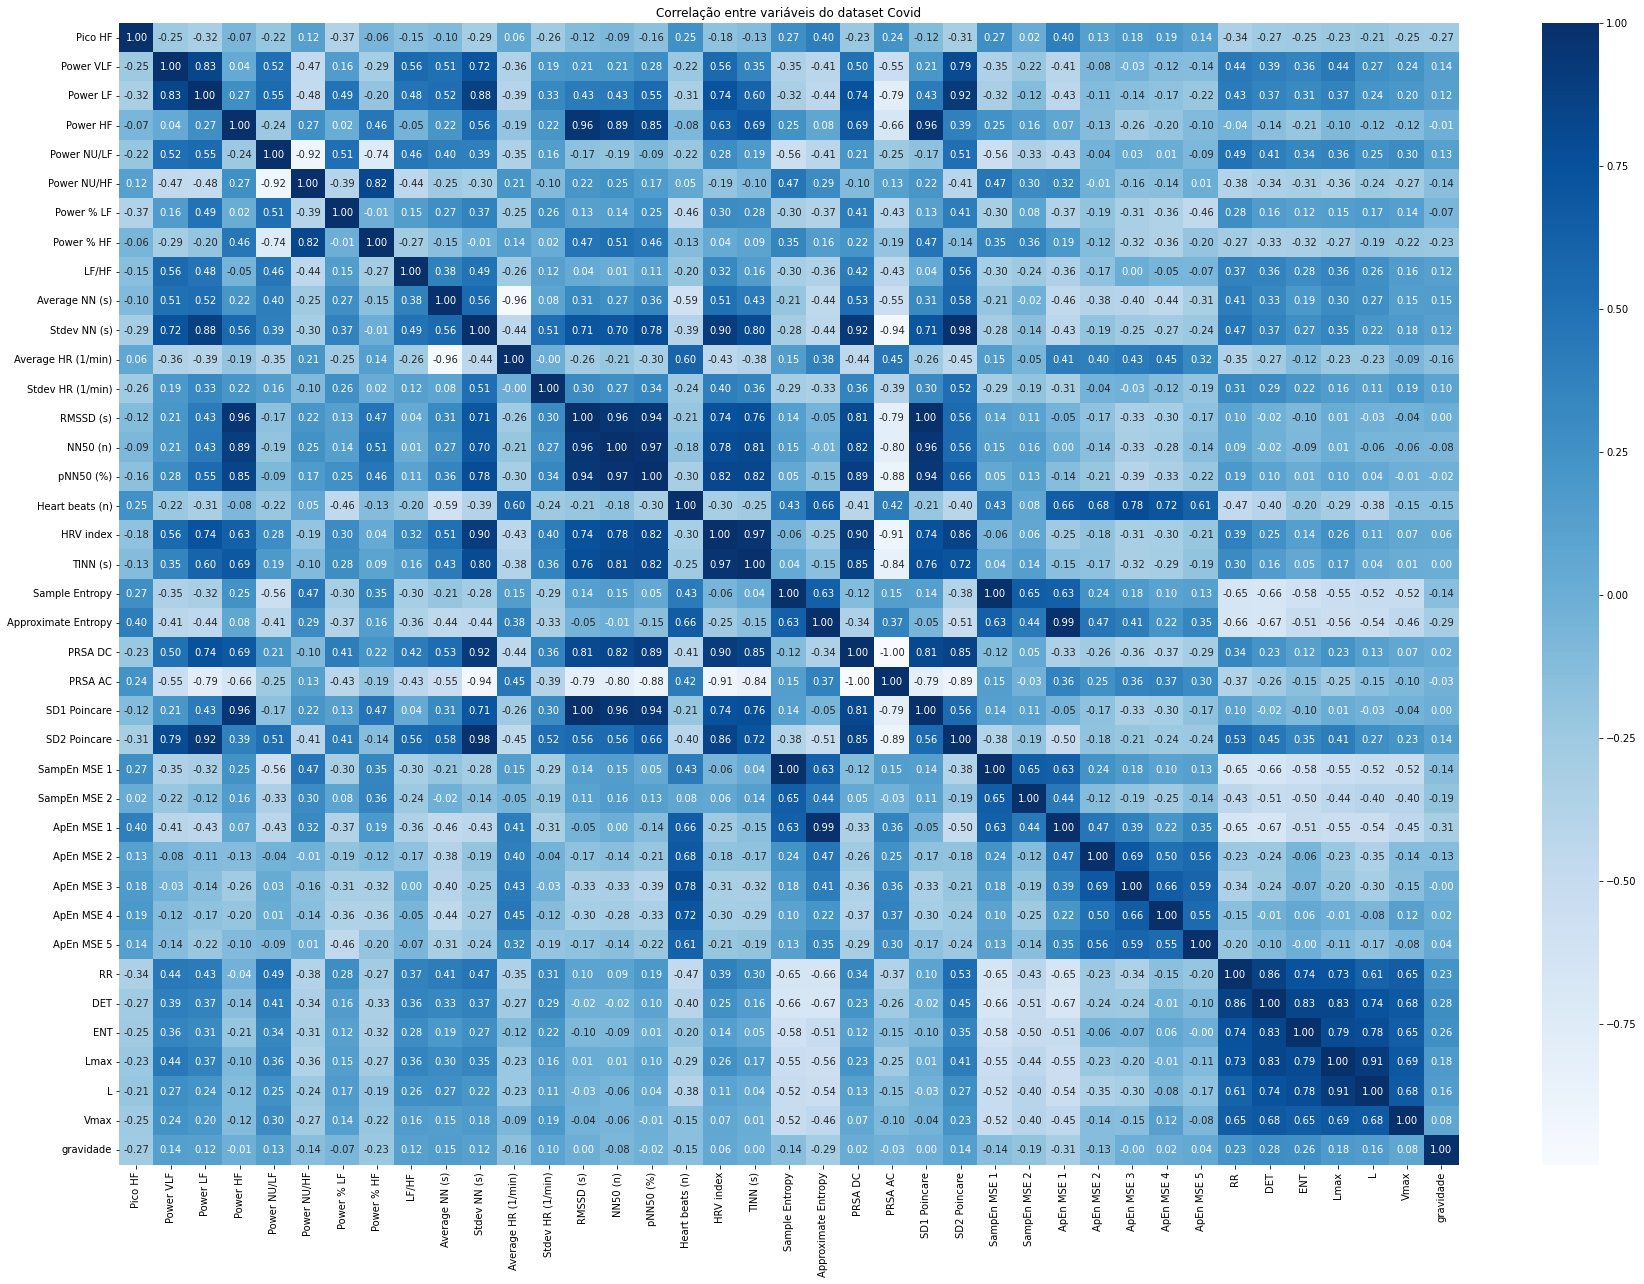

In [ ]:
#análise de correlação
#dataset.corr()
dataset.corr().to_excel("matrizCorrelacao.xlsx")
#Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 21))
sns.heatmap(dataset.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset Covid')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff07223de80>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

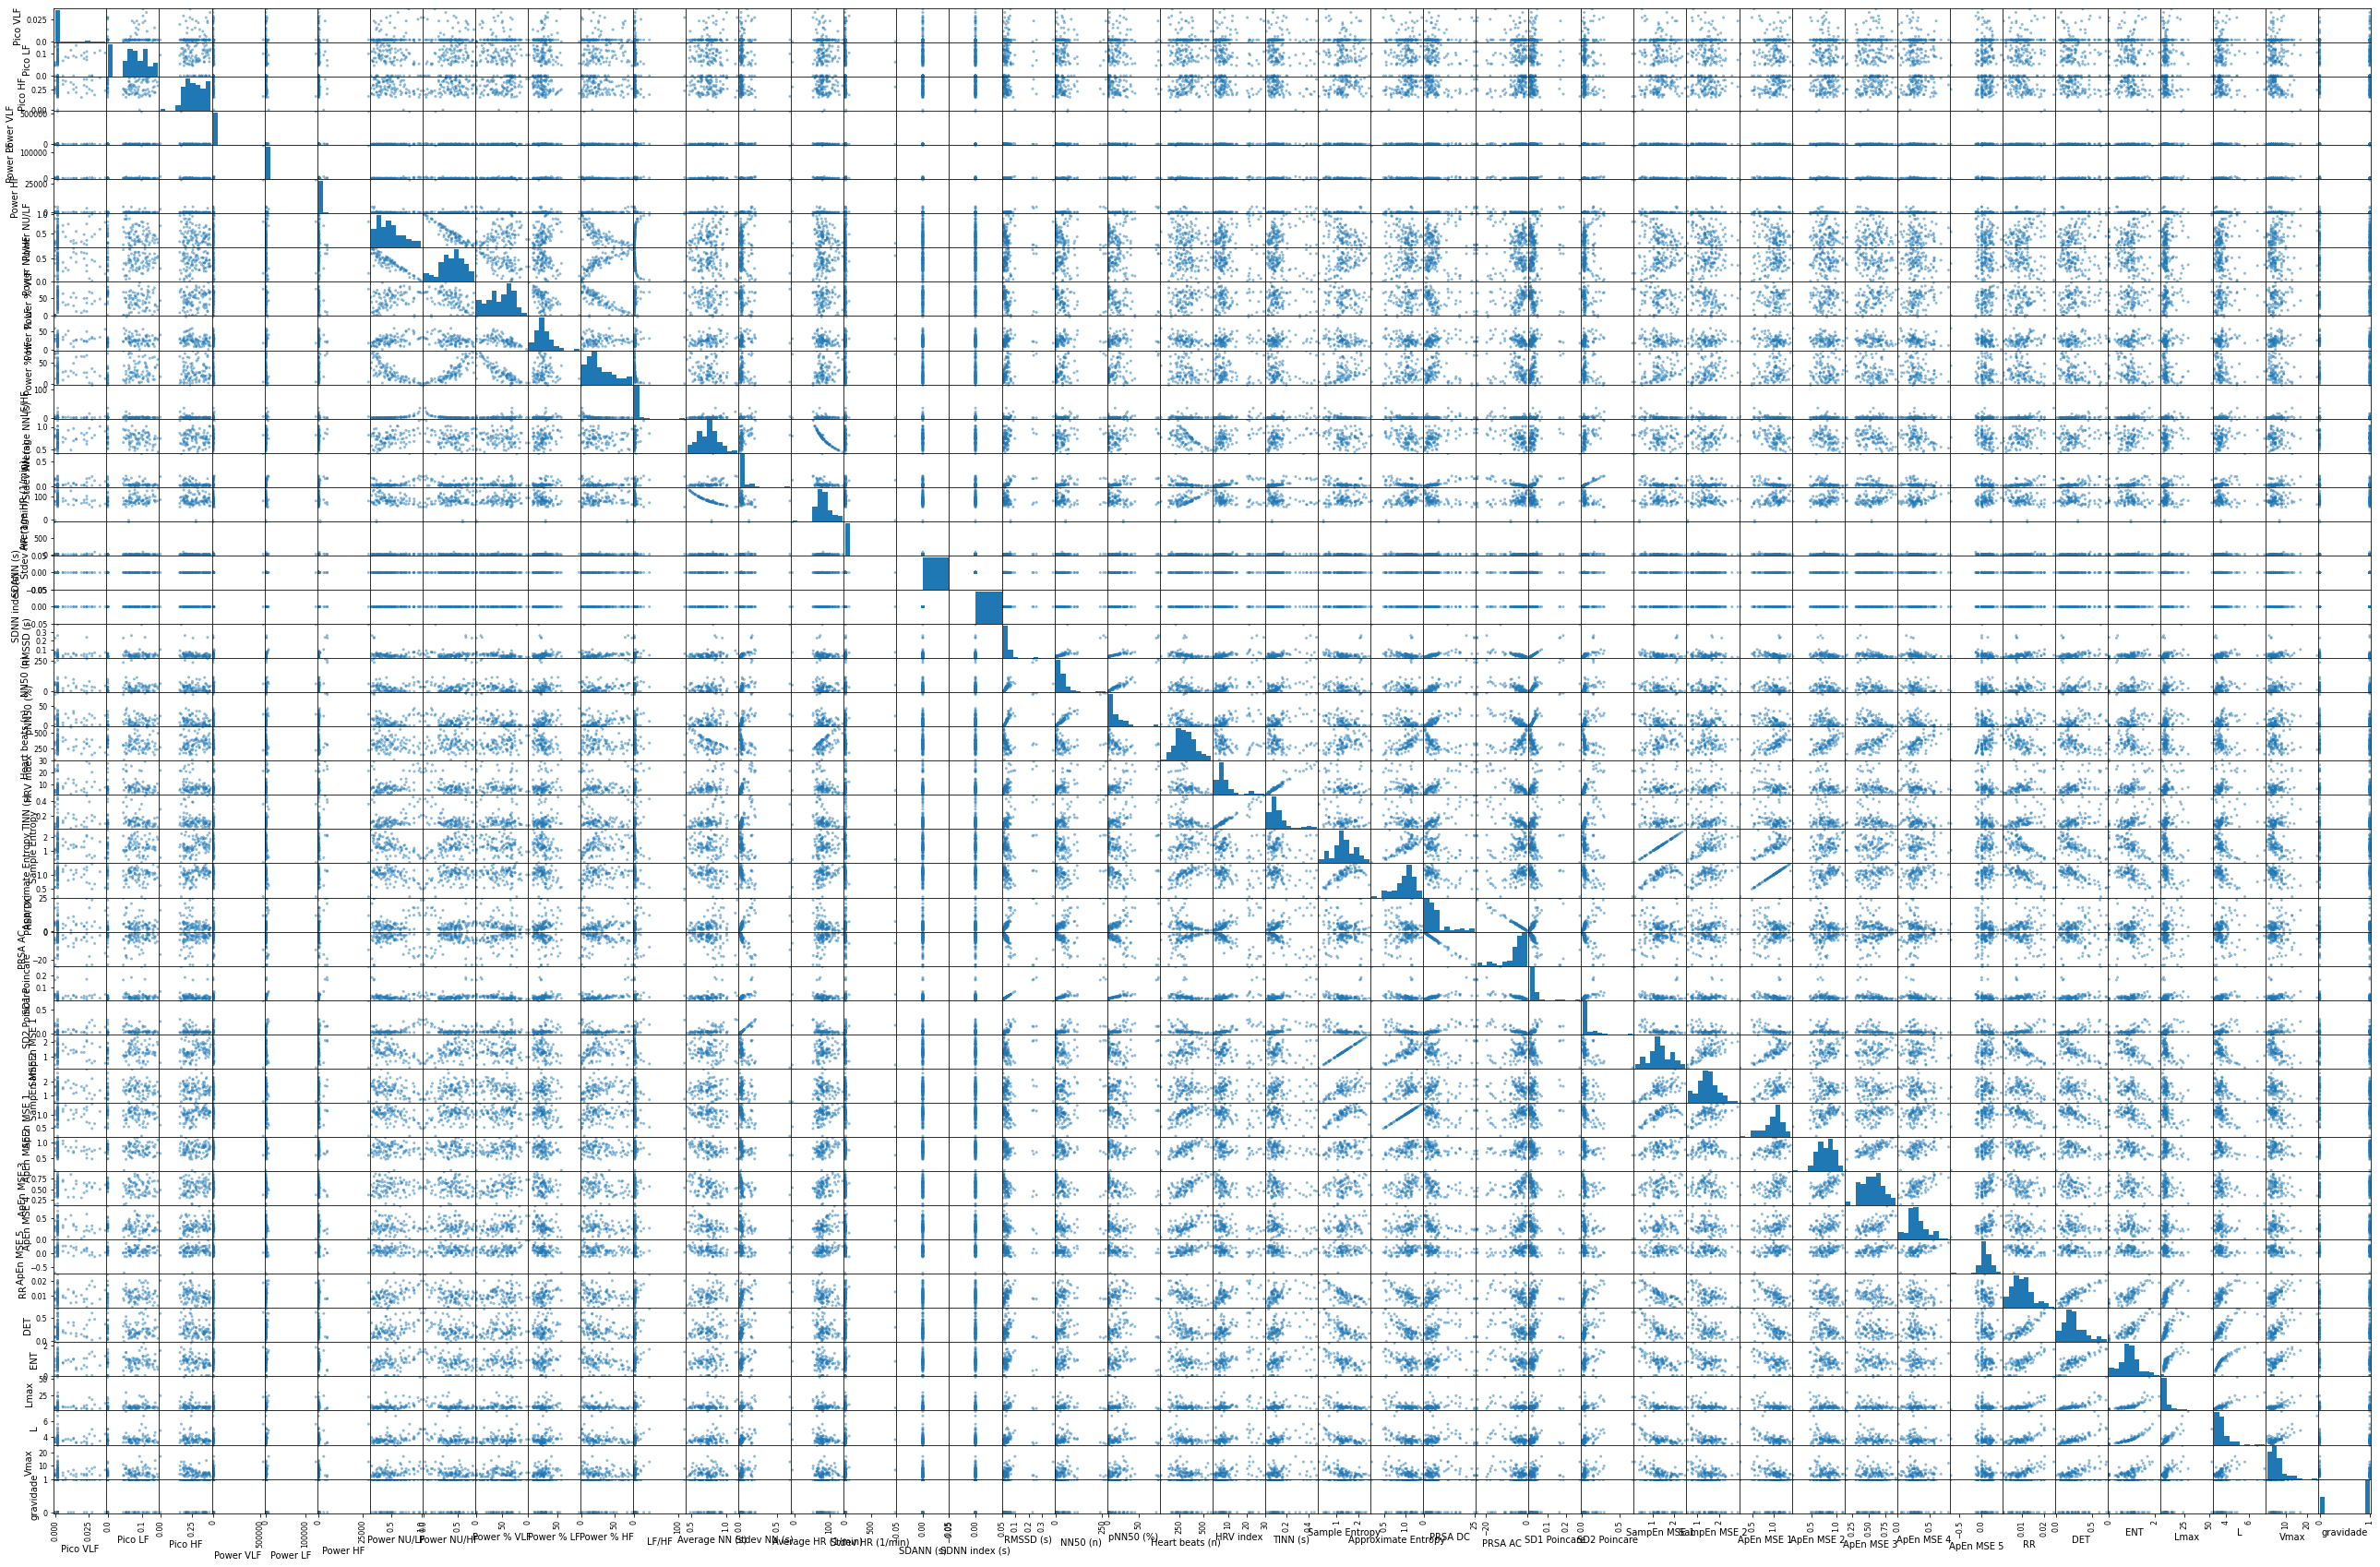

In [ ]:
pd.plotting.scatter_matrix(dataset.iloc[:,1:], figsize=(45,30))

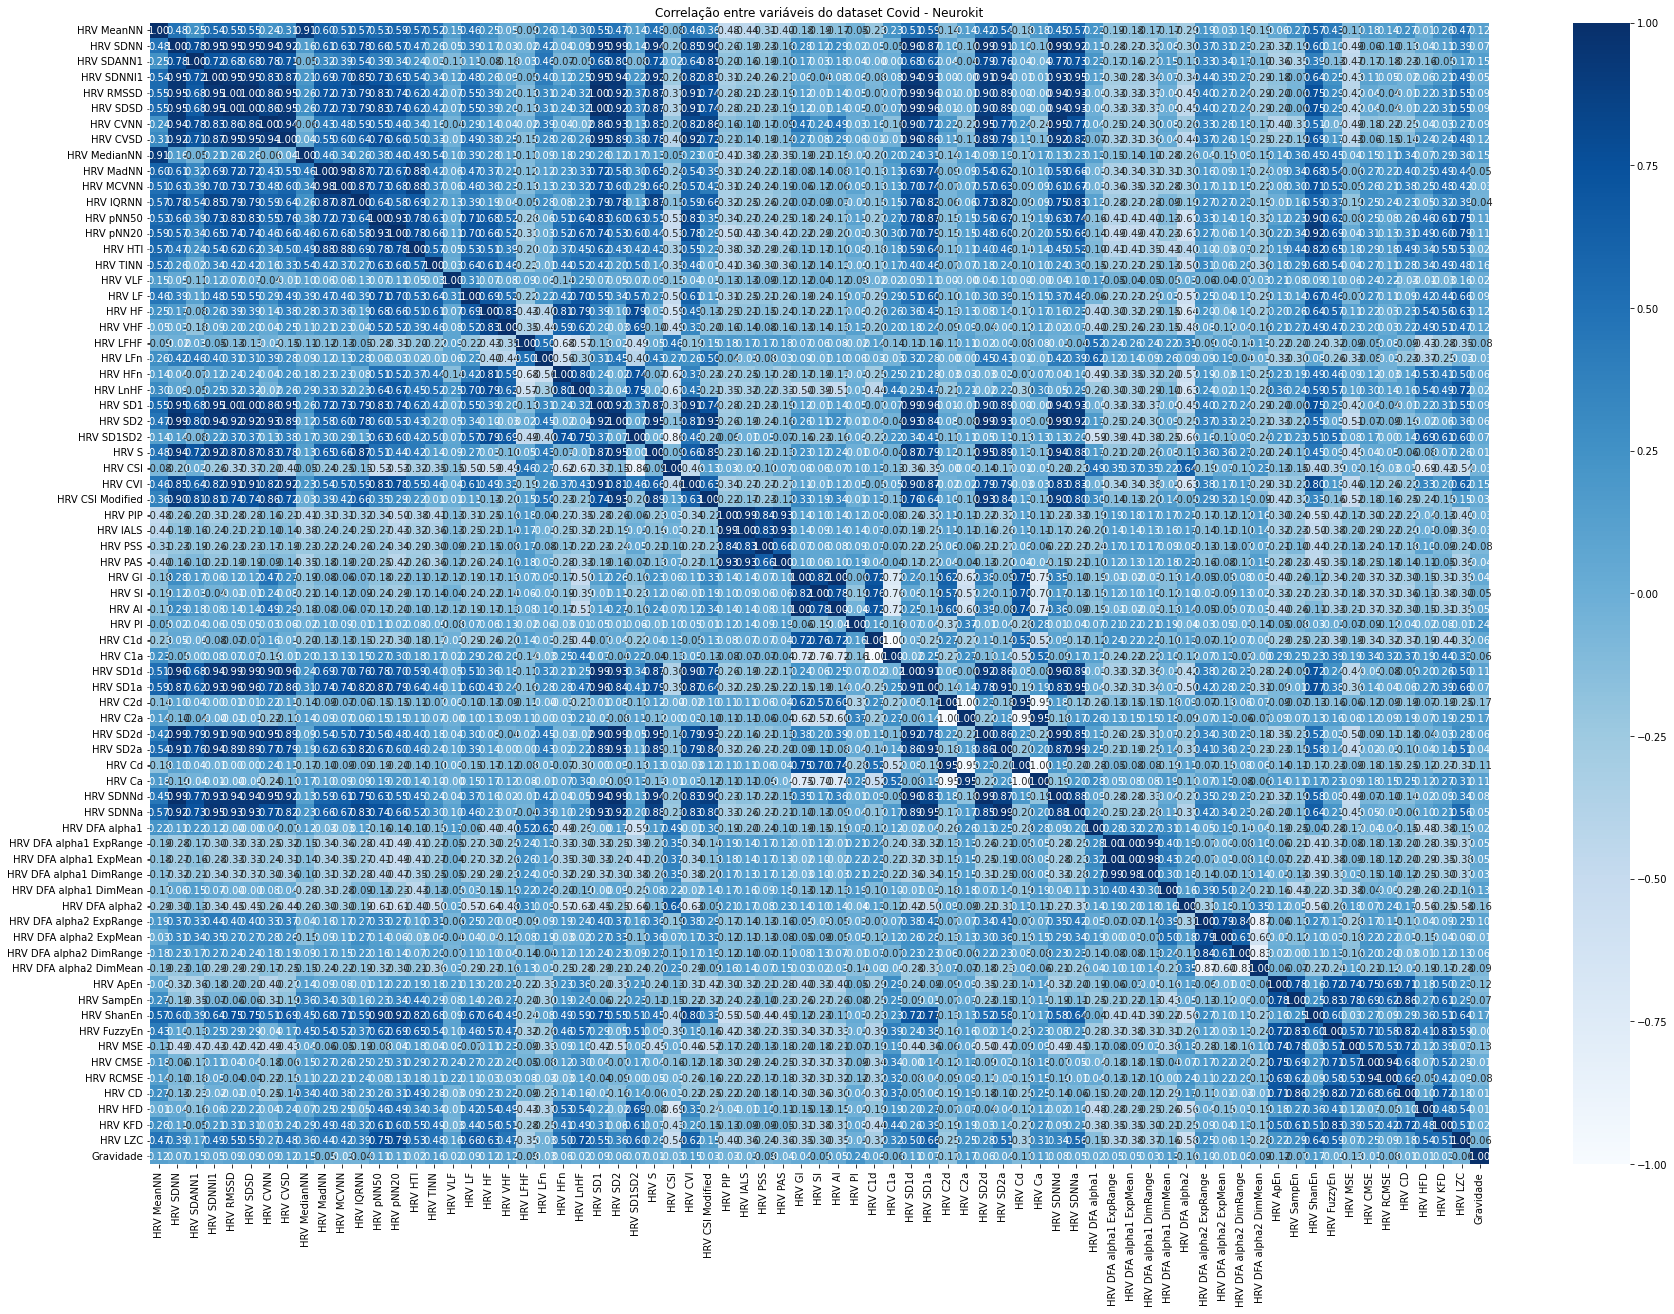

In [ ]:
#análise de correlação
#dataset_nk.corr()
dataset_nk.corr().to_excel("matrizCorrelacao_nk.xlsx")
#Mapa de calor

plt.figure(figsize=(30, 21))
sns.heatmap(dataset_nk.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset Covid - Neurokit')
plt.show()


# **Avaliação Geral**

**São calculadas as classificações utilizando a separação dos dados em 70-30 e 80-20, executadas 20x. **

In [ ]:
MT70 = MultiTeste()
MT70.Sorteio(dataset, coluna, 70, "exames")
#MT70.Sorteio(dataset_nk, coluna, 70, "exames")

MT80 = MultiTeste()
MT80.Sorteio(dataset, coluna, 80, "exames")
#MT80.Sorteio(dataset_nk, coluna, 80, "exames")

In [ ]:
#Rodar esse para considerar LOSO
rodadas = 20
resultado_70 = []
resultado_80 = []
inicio = time.time()
for i in range(rodadas):
    resultado_70.append(MT70.ClassificadorMedico())
    resultado_80.append(MT80.ClassificadorMedico())
    #resultado_70.append(MT70.Classificador2()) #Rodar esse para NÃO considerar LOSO
    #resultado_80.append(MT80.Classificador2()) #Rodar esse para NÃO considerar LOSO
print(f"Tempo decorrido: {(time.time() - inicio)/60:.2f} min")

Tempo decorrido: 4.21 min


In [ ]:
resultado_70 = np.array(resultado_70)
resultado_80 = np.array(resultado_80)
#resultado_final = []
resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1', 'revogação', 'precisão'])#, 'roc auc'])
recall = []
precisao = []
f1 = []
acuracia = []
roc = []
algoritmos = []
for k in range(18): #qtd algoritmos
    media_precisao = 0
    media_f1 = 0
    media_recall = 0
    media_acuracia = 0
    media_roc = 0
    for j in range(rodadas):
        media_recall += resultado_70[j,k,1]
        media_recall += resultado_80[j,k,1]
        media_precisao += resultado_70[j,k,2]
        media_precisao += resultado_80[j,k,2]
        if np.isnan(resultado_70[j,k,1]): 
            media_f1 += 0
        else:
            media_f1 += float(resultado_70[j,k,3])

        if np.isnan(resultado_80[j,k,1]): 
            media_f1 += 0
        else:
            media_f1 += float(resultado_80[j,k,3])
        media_acuracia += resultado_70[j,k,4]
        media_acuracia += resultado_80[j,k,4]
        #media_roc += resultado_70[j,k,5]
    algoritmos.append(resultado_70[j,k,0])
    precisao.append(media_precisao/(2*rodadas))
    f1.append(media_f1/(2*rodadas))
    recall.append(media_recall/(2*rodadas))
    acuracia.append(media_acuracia/(2*rodadas))
    #roc.append(media_roc/rodadas)
resultado_final['algoritmo'] = algoritmos
resultado_final['revogação'] = recall
resultado_final['precisão'] = precisao
resultado_final['f1'] = f1
resultado_final['acurácia'] = acuracia
#resultado_final_70['roc auc'] = roc

In [ ]:
resultado_final
MT70.OrdenaMetrica(resultado_final,'precisão',"sim")

algoritmo  acurácia        f1  revogação  precisão
0                             SVC  0.000000  0.000000   0.895833  0.944928
1   QuadraticDiscriminantAnalysis  0.000000  0.000000   0.895833  0.944928
2          RandomForestClassifier  0.747890  0.906413   0.753646  0.840396
3              LogisticRegression  0.743506  0.926768   0.718750  0.825000
4             OneVsRestClassifier  0.756494  0.470588   0.697917  0.817664
5            KNeighborsClassifier  0.685065  0.879679   0.697917  0.801561
6            ExtraTreesClassifier  0.692857  0.892708   0.687500  0.795468
7                  LGBMClassifier  0.701299  0.461538   0.645833  0.771429
8                   MLPClassifier  0.512987  0.756083   0.579167  0.699677
9                       LinearSVC  0.572078  0.299252   0.628646  0.695618
10     GradientBoostingClassifier  0.590260  0.406035   0.548958  0.686777
11              BaggingClassifier  0.600649  0.855302   0.569792  0.677972
12             AdaBoostClassifier  0.575812  0.400000   0.552083  0.674074
13         DecisionTreeClassifier  0.511364  0.856731   0.491667  0.651407
14     LinearDiscriminantAnalysis  0.516234  0.843434   0.531250  0.641379
15                  SGDClassifier  0.477110  0.477715   0.510417  0.637475
16                     GaussianNB  0.344156  0.711538   0.395833  0.467857
17      GaussianProcessClassifier  0.094156  0.416667   0.187500  0.168478

In [ ]:
MT70.OrdenaMetrica(resultado_final,'f1',"sim")

algoritmo  acurácia        f1  revogação  precisão
0              LogisticRegression  0.743506  0.926768   0.718750  0.825000
1          RandomForestClassifier  0.747890  0.906413   0.753646  0.840396
2            ExtraTreesClassifier  0.692857  0.892708   0.687500  0.795468
3            KNeighborsClassifier  0.685065  0.879679   0.697917  0.801561
4          DecisionTreeClassifier  0.511364  0.856731   0.491667  0.651407
5               BaggingClassifier  0.600649  0.855302   0.569792  0.677972
6      LinearDiscriminantAnalysis  0.516234  0.843434   0.531250  0.641379
7                   MLPClassifier  0.512987  0.756083   0.579167  0.699677
8                      GaussianNB  0.344156  0.711538   0.395833  0.467857
9                   SGDClassifier  0.477110  0.477715   0.510417  0.637475
10            OneVsRestClassifier  0.756494  0.470588   0.697917  0.817664
11                 LGBMClassifier  0.701299  0.461538   0.645833  0.771429
12      GaussianProcessClassifier  0.094156  0.416667   0.187500  0.168478
13     GradientBoostingClassifier  0.590260  0.406035   0.548958  0.686777
14             AdaBoostClassifier  0.575812  0.400000   0.552083  0.674074
15                      LinearSVC  0.572078  0.299252   0.628646  0.695618
16  QuadraticDiscriminantAnalysis  0.000000  0.000000   0.895833  0.944928
17                            SVC  0.000000  0.000000   0.895833  0.944928

In [ ]:
MT70.OrdenaMetrica(resultado_final,'acurácia',"sim")

algoritmo  acurácia        f1  revogação  precisão
0             OneVsRestClassifier  0.756494  0.470588   0.697917  0.817664
1          RandomForestClassifier  0.747890  0.906413   0.753646  0.840396
2              LogisticRegression  0.743506  0.926768   0.718750  0.825000
3                  LGBMClassifier  0.701299  0.461538   0.645833  0.771429
4            ExtraTreesClassifier  0.692857  0.892708   0.687500  0.795468
5            KNeighborsClassifier  0.685065  0.879679   0.697917  0.801561
6               BaggingClassifier  0.600649  0.855302   0.569792  0.677972
7      GradientBoostingClassifier  0.590260  0.406035   0.548958  0.686777
8              AdaBoostClassifier  0.575812  0.400000   0.552083  0.674074
9                       LinearSVC  0.572078  0.299252   0.628646  0.695618
10     LinearDiscriminantAnalysis  0.516234  0.843434   0.531250  0.641379
11                  MLPClassifier  0.512987  0.756083   0.579167  0.699677
12         DecisionTreeClassifier  0.511364  0.856731   0.491667  0.651407
13                  SGDClassifier  0.477110  0.477715   0.510417  0.637475
14                     GaussianNB  0.344156  0.711538   0.395833  0.467857
15      GaussianProcessClassifier  0.094156  0.416667   0.187500  0.168478
16  QuadraticDiscriminantAnalysis  0.000000  0.000000   0.895833  0.944928
17                            SVC  0.000000  0.000000   0.895833  0.944928

In [ ]:
MT70.OrdenaMetrica(resultado_final,'revogação',"sim")

algoritmo  acurácia        f1  revogação  precisão
0                             SVC  0.000000  0.000000   0.895833  0.944928
1   QuadraticDiscriminantAnalysis  0.000000  0.000000   0.895833  0.944928
2          RandomForestClassifier  0.747890  0.906413   0.753646  0.840396
3              LogisticRegression  0.743506  0.926768   0.718750  0.825000
4            KNeighborsClassifier  0.685065  0.879679   0.697917  0.801561
5             OneVsRestClassifier  0.756494  0.470588   0.697917  0.817664
6            ExtraTreesClassifier  0.692857  0.892708   0.687500  0.795468
7                  LGBMClassifier  0.701299  0.461538   0.645833  0.771429
8                       LinearSVC  0.572078  0.299252   0.628646  0.695618
9                   MLPClassifier  0.512987  0.756083   0.579167  0.699677
10              BaggingClassifier  0.600649  0.855302   0.569792  0.677972
11             AdaBoostClassifier  0.575812  0.400000   0.552083  0.674074
12     GradientBoostingClassifier  0.590260  0.406035   0.548958  0.686777
13     LinearDiscriminantAnalysis  0.516234  0.843434   0.531250  0.641379
14                  SGDClassifier  0.477110  0.477715   0.510417  0.637475
15         DecisionTreeClassifier  0.511364  0.856731   0.491667  0.651407
16                     GaussianNB  0.344156  0.711538   0.395833  0.467857
17      GaussianProcessClassifier  0.094156  0.416667   0.187500  0.168478

# **Avaliação com KFOLD**

**Como o dataset tem 98 linhas (exames), então foram utilizadas duas janelas, uma com 7 divisões e outra com 14. Em todas as execuções são executadas ambas as janelas e o resultado é calculado através da média.**

In [ ]:
import time
MT2 = MultiTeste()

In [ ]:
@jit(target_backend='cuda')
def geralGPUdeixaUmFora(bancoDados):
  resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
  f1 = []
  acuracia = []
  algoritmos = []
  rodadas_1 = 7
  rodadas_2 = 14
  inicio = time.time()
  for modelo in MT2.classificadores:
    algoritmos.append(modelo.__class__.__name__)
    acur = []
    f1score = []  
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT2.deixaUmForaXY(bancoDados, rodadas_1)       
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT2.deixaUmForaXY(bancoDados, rodadas_2)
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    acuracia.append(np.mean(acur))
    f1.append(np.mean(f1score))
  resultado_final['algoritmo'] = algoritmos 
  resultado_final['acurácia'] = acuracia
  resultado_final['f1'] = f1
  #print(f"Média de Acurácia para o modelo {modelo.__class__.__name__}= é {np.mean(pontos)}")
  print('Tempo decorrido Total: {:.0f}s'.format((time.time() - inicio)))
  return resultado_final

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
res_1fora = geralGPUdeixaUmFora(dataset)

Tempo decorrido Total: 49s


In [ ]:
print("Acurácia")
ordenada = MT2.OrdenaMetrica(res_1fora,'acurácia',"sim")
print(ordenada)

Acurácia
                        algoritmo  acurácia        f1
0                             SVC  0.663265  0.781819
1            LogisticRegressionCV  0.656463  0.763840
2   QuadraticDiscriminantAnalysis  0.656463  0.778445
3      LinearDiscriminantAnalysis  0.639456  0.702289
4                   MLPClassifier  0.622449  0.701585
5            KNeighborsClassifier  0.612245  0.693625
6             OneVsRestClassifier  0.608844  0.709689
7            ExtraTreesClassifier  0.605442  0.724114
8          RandomForestClassifier  0.605442  0.733723
9              LogisticRegression  0.605442  0.725590
10                  SGDClassifier  0.591837  0.691480
11                  SGDClassifier  0.581633  0.663804
12         DecisionTreeClassifier  0.574830  0.676068
13                 LGBMClassifier  0.574830  0.669621
14                      LinearSVC  0.571429  0.669621
15              BaggingClassifier  0.534014  0.622935
16     GradientBoostingClassifier  0.534014  0.649744
17             AdaB

# **Feature Selection com MLxtend**

In [ ]:
X = dataset_nk.iloc[:,1:-1]
y = dataset_nk["Gravidade"]

In [ ]:
feature_names = tuple(X.columns)

NameError: ignored

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import joblib
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#modelo_fs = [RandomForestClassifier(max_depth=5, n_estimators=300, max_features=1), SVC(gamma='auto'), ExtraTreesClassifier(n_estimators=300), QuadraticDiscriminantAnalysis()]
#modelo_fs = SVC(gamma='auto')
modelo_fs = RandomForestClassifier(max_depth=5, n_estimators=300, max_features=1)
#modelo_fs = ExtraTreesClassifier(n_estimators=300)
#modelo_fs = QuadraticDiscriminantAnalysis()

In [ ]:
sfs1 = SFS(modelo_fs,
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(X, y)#,custom_feature_names=feature_names)

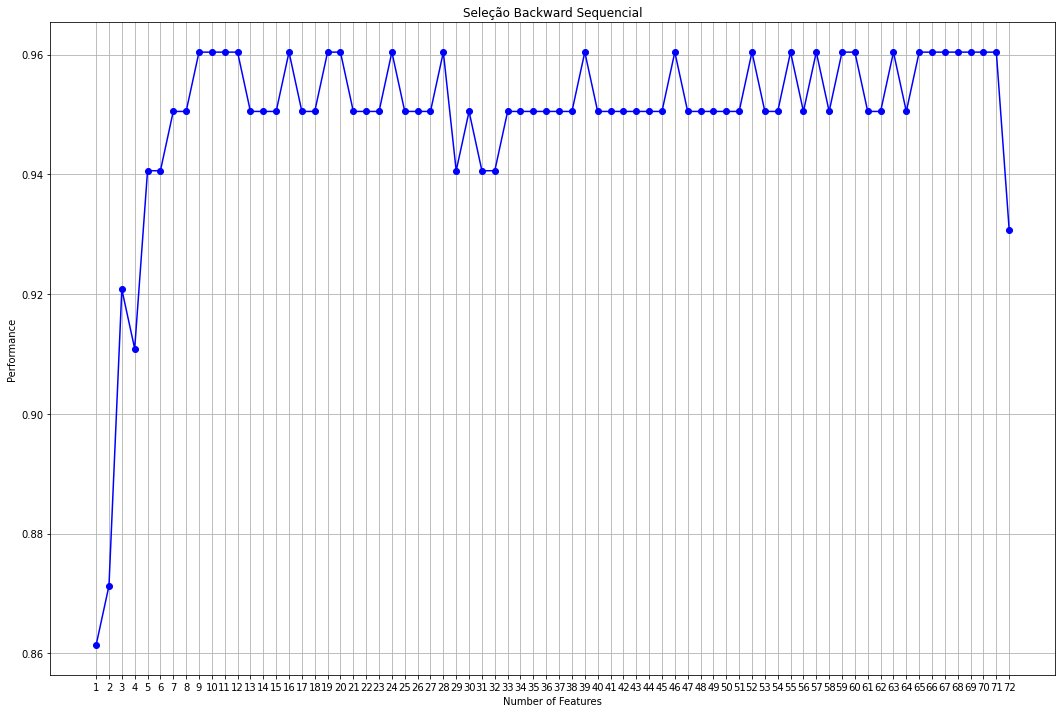

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.rcParams['figure.figsize'] = (18, 12)
plt.title('Seleção Backward Sequencial')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
nova_matriz_features = df[["feature_names","avg_score"]].query("avg_score >= 0.95").min()

In [ ]:
df[["feature_names","avg_score"]].query("avg_score >= 0.95")

feature_names avg_score
71  (HRV MeanNN, HRV SDNN, HRV SDANN1, HRV SDNNI1,...  0.960396
70  (HRV MeanNN, HRV SDNN, HRV SDANN1, HRV SDNNI1,...  0.960396
69  (HRV MeanNN, HRV SDNN, HRV SDANN1, HRV SDNNI1,...  0.960396
68  (HRV MeanNN, HRV SDNN, HRV SDANN1, HRV SDNNI1,...  0.960396
67  (HRV MeanNN, HRV SDNN, HRV SDANN1, HRV SDNNI1,...  0.960396
..                                                ...       ...
11  (HRV SDANN1, HRV SDNNI1, HRV MadNN, HRV IQRNN,...  0.960396
10  (HRV SDNNI1, HRV MadNN, HRV IQRNN, HRV pNN20, ...  0.960396
9   (HRV SDNNI1, HRV MadNN, HRV IQRNN, HRV pNN20, ...  0.960396
8   (HRV SDNNI1, HRV IQRNN, HRV pNN20, HRV TINN, H...  0.950495
7   (HRV SDNNI1, HRV IQRNN, HRV pNN20, HRV TINN, H...  0.950495

[62 rows x 2 columns]

In [ ]:
#X.loc[nova_matriz_features["feature_names"]]
#nova_matriz_features["feature_names"]
novo_dataset_fs = pd.DataFrame(columns=nova_matriz_features["feature_names"])

In [ ]:
for feat in novo_dataset_fs:
    novo_dataset_fs[feat] = dataset_nk[feat]

In [ ]:
inicio = time.time()
kfold = 51 #14
pontos_modelo = []            
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novo_dataset_fs, kfold)
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    X_treino = X_treino.astype('float')
    X_teste = X_teste.astype('float')
    y_treino = y_treino.astype('int32')
    y_teste = y_teste.astype('int32')
    modelo_fs.fit(X_treino, y_treino)
    y_prev = modelo_fs.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_modelo.append(pontuacao)
print(f"Média de Acurácia = {np.mean(pontos_modelo)}")

print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Média de Acurácia = 1.0
Tempo decorrido: 1min


In [ ]:
inicio = time.time()
kfold = 17 #14
pontos_modelo = []            
Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(dataset_nk, kfold)       
for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
    X_treino = X_treino.astype('float')
    X_teste = X_teste.astype('float')
    y_treino = y_treino.astype('int32')
    y_teste = y_teste.astype('int32')
    modelo_fs.fit(X_treino, y_treino)
    y_prev = modelo_fs.predict(X_teste)
    pontuacao = accuracy_score(y_teste, y_prev)
    pontos_modelo.append(pontuacao)
print(f"Média de Acurácia = {np.mean(pontos_modelo)}")

print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Média de Acurácia = 0.6400000000000001
Tempo decorrido: 0min


# **Comparação de Melhores Algoritmos - Com Feature Selection**

In [ ]:
melhores = [
        #LinearSVC(),
        #SGDClassifier(max_iter=100, tol=1e-3), 
        #LogisticRegression(solver='lbfgs'), 
        #GaussianNB(), 
        #LinearDiscriminantAnalysis(),
        #OneVsRestClassifier(LinearSVC(random_state=0, dual=False)), #multiclass
        LGBMClassifier(),
        GradientBoostingClassifier(),
        #KNeighborsClassifier(),
        #LogisticRegression(solver='lbfgs'), 
        #BaggingClassifier(), 
        ExtraTreesClassifier(n_estimators=300),
        RandomForestClassifier(max_depth=5, n_estimators=300, max_features=1),
        AdaBoostClassifier(),
        #SGDClassifier(),
        SVC(gamma='auto'),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        BaggingClassifier(),
        DecisionTreeClassifier(max_depth=5),
        QuadraticDiscriminantAnalysis(),
        MLPClassifier(alpha=1, max_iter=1000)
    ]


In [ ]:
def FS(model, bancoDados):
    X = dataset.iloc[:,1:-1]
    y = dataset["gravidade"]
    #feature_names = tuple(X.columns)
    fs = SFS(#SVC(gamma='auto', max_iter=1000),
           model,
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='accuracy',  # sklearn classifiers
           cv=0)

    backwardFS = fs.fit(X, y)#,custom_feature_names=feature_names)
    df = pd.DataFrame.from_dict(backwardFS.get_metric_dict()).T
    nova_matriz_features = df[["feature_names","avg_score"]].query("avg_score >= 0.95").min()
    novo_X = pd.DataFrame(columns=nova_matriz_features["feature_names"])
    for feat in novo_X:
        novo_X[feat] = dataset[feat]
    novo_dataset = novo_X
    novo_dataset['gravidade'] = y
    
    return novo_dataset


In [ ]:
def geralFSdeixaUmFora(bancoDados, MT, modelos):
  resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
  f1 = []
  acuracia = []
  algoritmos = []
  rodadas_1 = 7
  rodadas_2 = 14
  #divisao_treino = 80
  inicio = time.time()
  for modelo in modelos:
    algoritmos.append(modelo.__class__.__name__)
    print(f"Algoritmo {modelo.__class__.__name__}")
    acur = []
    f1score = []
    novoBancoDados = FS(modelo, bancoDados) 
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novoBancoDados, rodadas_1)
    #Xs_treino, ys_treino, Xs_teste, ys_teste = MT.sorteioTreinoTeste(novoBancoDados, 80)
    #print(f"Xs Treino = {Xs_treino.shape} e y_treino = {ys_teste.shape}")
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novoBancoDados, rodadas_2)
    #Xs_treino, ys_treino, Xs_teste, ys_teste = MT.sorteioTreinoTeste(novoBancoDados, 90)
    #print(f"Xs Treino = {Xs_treino.shape} e y_treino = {ys_teste.shape}")
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
    acuracia.append(np.mean(acur))
    #print(f"Acurácia= {np.mean(acur)}")
    f1.append(np.mean(f1score))
    #print(f"F1-score= {np.mean(f1score)}")
  resultado_final['algoritmo'] = algoritmos 
  resultado_final['acurácia'] = acuracia
  resultado_final['f1'] = f1
  #print(f"Média de Acurácia para o modelo {modelo.__class__.__name__}= é {np.mean(pontos)}")
  print('Tempo decorrido Total: {:.0f}s'.format((time.time() - inicio)))
  return resultado_final

In [ ]:
MT_FS = MultiTeste()
fs_1_fora = geralFSdeixaUmFora(dataset, MT_FS, so_os_melhores)

Algoritmo ExtraTreesClassifier
Algoritmo QuadraticDiscriminantAnalysis


TypeError: ignored

In [ ]:
print("Acurácia")
ordenada = MT_FS.OrdenaMetrica(fs_1_fora,'acurácia',"sim")
print(ordenada)

Acurácia
                        algoritmo  acurácia        f1
0   QuadraticDiscriminantAnalysis  0.704082  0.793540
1                             SVC  0.653061  0.782360
2          RandomForestClassifier  0.639456  0.758410
3                   MLPClassifier  0.595238  0.679764
4              AdaBoostClassifier  0.585034  0.680514
5                  LGBMClassifier  0.581633  0.681410
6            ExtraTreesClassifier  0.574830  0.688531
7          DecisionTreeClassifier  0.557823  0.654053
8      GradientBoostingClassifier  0.540816  0.651359
9               BaggingClassifier  0.517007  0.605777
10      GaussianProcessClassifier  0.503401  0.573460


In [ ]:
def fsGeral(bancoDados, MT, modelos):
  resultado_final = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
  f1 = []
  acuracia = []
  algoritmos = []
  rodadas_1 = 7
  rodadas_2 = 14
  #divisao_treino = 80
  inicio = time.time()
  for modelo in modelos:
    algoritmos.append(modelo.__class__.__name__)
    print(f"Algoritmo {modelo.__class__.__name__}")
    acur = []
    f1score = []
    novoBancoDados = FS(modelo, bancoDados) 
    #Xs_treino, ys_treino, Xs_teste, ys_teste = MT.deixaUmForaXY(novoBancoDados, rodadas_1)
    Xs_treino, ys_treino, Xs_teste, ys_teste = MT.sorteioTreinoTeste(novoBancoDados, 80)
    #print(f"Xs Treino = {Xs_treino.shape} e y_treino = {ys_teste.shape}")
    for X_treino, y_treino, X_teste, y_teste in zip(Xs_treino, ys_treino, Xs_teste, ys_teste):
        modelo.fit(X_treino, y_treino)
        y_prev = modelo.predict(X_teste)
        acu_score = accuracy_score(y_teste, y_prev)
        acur.append(acu_score)
        f1s = f1_score(y_teste, y_prev)
        f1score.append(f1s)
  resultado_final['algoritmo'] = algoritmos 
  resultado_final['acurácia'] = acuracia
  resultado_final['f1'] = f1
  #print(f"Média de Acurácia para o modelo {modelo.__class__.__name__}= é {np.mean(pontos)}")
  print('Tempo decorrido Total: {:.0f}s'.format((time.time() - inicio)))
  return resultado_final

In [ ]:
MT_FS = MultiTeste()
fs_geral = fsGeral(dataset, MT_FS, so_os_melhores)

Algoritmo ExtraTreesClassifier


ValueError: ignored

In [ ]:
print("Acurácia")
ordenada = MT_FS.OrdenaMetrica(fs_geral,'acurácia',"sim")
print(ordenada)

# ***Feature Selection com SKLearn***

In [ ]:
so_os_melhores = [
    ExtraTreesClassifier(n_estimators=200),
    QuadraticDiscriminantAnalysis(reg_param=0.4),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.34),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.35),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.47),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.72),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.73),
    LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.79),
    LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.35),
    LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.73),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=2),
    KNeighborsClassifier(n_neighbors=10),
    SVC(kernel='linear', C=10),
    SVC(kernel='rbf', C=1, gamma=0.001),
    SVC(kernel='rbf', C=10, gamma=0.0001)
]

In [ ]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [ ]:
X = dataset.iloc[:,1:-1]
y = dataset["gravidade"]

In [ ]:
X_kBest = []
for i in range(2, int(X.shape[1] - 1)):
    X_kBest.append(np.array(SelectKBest(f_classif, k=int(i)).fit_transform(X, y)))
    #print(f" Y={i} X Best = {X_kBest.shape}")
#X_kBest = np.array(X_kBest)

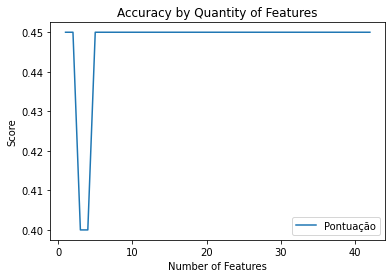

In [ ]:
import matplotlib.pyplot as plt
x_line = np.arange(1, X.shape[1]) 
plt.plot(x_line, pontos_qda, label="Pontuação")
#plt.plot(x, y2, label="line H")
plt.plot()
plt.rcParams['figure.figsize'] = (15, 12)
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Accuracy by Quantity of Features")
plt.legend()
plt.show()

In [ ]:
#MT_feat = MultiTeste()

divisao_treino = 80
pontos = []
max = 0
qtd_feat = 0
coluna = 'PACIENTE'
tamanho_X = int((divisao_treino/100) * len(dataset)) #subsituir por SorteioExames

inicio = time.time()
for algoritmo in so_os_melhores:#MT_feat.classificadores:
    print(f"Rodando {algoritmo.__class__.__name__}") 
    for X_kb in X_kBest:
        X_kb = pd.DataFrame(X_kb)
        X_kb.insert(0, coluna, dataset[coluna])
        X_treino_kb, X_teste_kb, y_treino_kb, y_teste_kb = MT.sorteiaExames(X_kb, 0, divisao_treino)
        #print(f"Formato Treino {X_treino_kb.shape}") 
        #X_treino = X_[0:tamanho_X, :]
        #y_treino = y[0:tamanho_X]
        #X_teste = X_[tamanho_X:, :]
        #y_teste = y[tamanho_X:]
        algoritmo.fit(X_treino_kb, y_treino_kb)
        y_prev_kb = algoritmo.predict(X_teste_kb)
        pontuacao = accuracy_score(y_teste_kb, y_prev_kb)
        if max < pontuacao:
            max = pontuacao
            qtd_feat = X_kb.shape[1]
        #print(f"Pontuação com {X_.shape} features = {pontuacao}")
        pontos.append(pontuacao)
    print(f"Média de Acurácia de {algoritmo.__class__.__name__} = {np.mean(pontos)} e melhor resultado {np.max(pontos)} com {qtd_feat} feature(s)")

print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Rodando ExtraTreesClassifier
Média de Acurácia de ExtraTreesClassifier = 0.33745648714821785 e melhor resultado 0.85 com 9 feature(s)
Rodando QuadraticDiscriminantAnalysis


ValueError: ignored

# ***Feature Importance***






Algoritmo SVC(gamma='auto') não possui o método feature_importances_

Algoritmo GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)) não possui o método feature_importances_

Algoritmo BaggingClassifier() não possui o método feature_importances_


Algoritmo QuadraticDiscriminantAnalysis() não possui o método feature_importances_

Algoritmo MLPClassifier(alpha=1, max_iter=1000) não possui o método feature_importances_



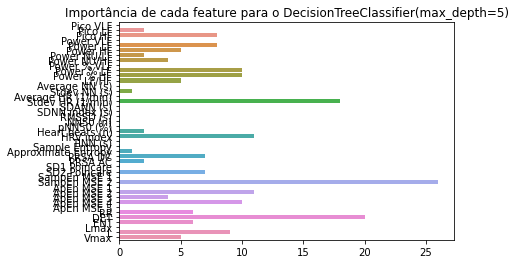

In [ ]:
import pandas as pd
import seaborn as sns

MT_importancia = MultiTeste()
X_treino_imp, X_teste_imp, y_treino_imp, y_teste_imp = MT.sorteiaExames(dataset, coluna, 80)
# Treinando modelo
for modelo_i in melhores:
    modelo_i.fit(X_treino_imp, y_treino_imp)
    # Mostrando importância de cada feature
    try:
        #print(f"Algoritmo {modelo_i}: Features {modelo_i.feature_importances_}")
        importances = pd.Series(data=modelo_i.feature_importances_, index=dataset.columns[1:-1])
        titulo = f"Importância de cada feature para o {modelo_i}"
        sns.barplot(x=importances, y=importances.index, orient='h').set_title(titulo)
    except Exception as err:
        print(f"Algoritmo {modelo_i} não possui o método feature_importances_")
        print(f"Segue Coeficientes: {modelo_i.coef_}")
    print()

# ***Leave One Subject Out***

In [ ]:
MT_r1 = MultiTeste()
#RestaUm_DF = pd.DataFrame()

In [ ]:
algoritmos = []
for modelo in MT_r1.classificadores:
    algoritmos.append(modelo.__class__.__name__)
algoritmos = np.array(algoritmos)


In [ ]:
unicos = dataset['PACIENTE'].unique()
#acuracia = []
resultados_acur = []
#res_DF = pd.DataFrame(columns=['algoritmo', 'acurácia', 'f1'])
acuracia_total = []
f1_total = []
for paciente in unicos:
    acuracia = []
    f1 = []
    Teste = dataset.query("PACIENTE == @paciente")
    Treino = dataset.drop(dataset.query("PACIENTE == @paciente").index)
    X_treino = Treino.iloc[:,1:-1]
    y_treino = Treino.iloc[:,-1]
    X_teste = Teste.iloc[:,1:-1]
    y_teste = Teste.iloc[:,-1]
    for modelo in MT_r1.classificadores:
        #algoritmos.append(modelo.__class__.__name__)
        modelo.fit(X_treino, y_treino)
        previsao = modelo.predict(X_teste)
        acur_rodada = accuracy_score(y_teste, previsao)
        acuracia.append(acur_rodada)
        #print(f"Modelo {modelo.__class__.__name__} Acc= {accuracy_score(y_teste, previsao)} F1={f1_score(y_teste, previsao)}")
    resultados_acur.append(acuracia)#, axis=0)

In [ ]:
resultados_acur = np.array(resultados_acur)
resultados_acur.shape

(50, 20)

In [ ]:
RestaUm_DF = pd.DataFrame(resultados_acur)
RestaUm_DF.columns = algoritmos

In [ ]:
RestaUm_DF.mean(axis='rows')

SVC                              0.66
GaussianProcessClassifier        0.36
LinearSVC                        0.59
SGDClassifier                    0.70
KNeighborsClassifier             0.63
LogisticRegression               0.59
LogisticRegressionCV             0.66
BaggingClassifier                0.48
ExtraTreesClassifier             0.64
RandomForestClassifier           0.60
GaussianNB                       0.30
DecisionTreeClassifier           0.51
MLPClassifier                    0.55
AdaBoostClassifier               0.42
LinearDiscriminantAnalysis       0.61
QuadraticDiscriminantAnalysis    0.66
OneVsRestClassifier              0.60
LGBMClassifier                   0.44
GradientBoostingClassifier       0.47
SGDClassifier                    0.56
dtype: float64

In [ ]:
modelos = []
for modelo in MT_r1.classificadores:
    modelos.append(modelo.__class__.__name__)
modelos = np.array(modelos)

In [ ]:
unicos = dataset['PACIENTE'].unique()
#acuracia = []
resultados = []
for paciente in unicos:
    acuracia = []
    f1 = []
    Teste = dataset.query("PACIENTE == @paciente")
    Treino = dataset.drop(dataset.query("PACIENTE == @paciente").index)
    X_treino = Treino.iloc[:,1:-1]
    y_treino = Treino.iloc[:,-1]
    X_teste = Teste.iloc[:,1:-1]
    y_teste = Teste.iloc[:,-1]
    for modelo in MT_r1.classificadores:
        #algoritmos.append(modelo.__class__.__name__)
        modelo.fit(X_treino, y_treino)
        previsao = modelo.predict(X_teste)
        acur_rodada = accuracy_score(y_teste, previsao)
        acuracia.append(acur_rodada)
        f1Score = f1_score(y_teste, previsao)
        f1.append(f1Score)
        #print(f"Modelo {modelo.__class__.__name__} Acc= {accuracy_score(y_teste, previsao)} F1={f1_score(y_teste, previsao)}")
    resultados.append(f1)


In [ ]:
f1_DF = pd.DataFrame(resultados)
f1_DF.columns = modelos

In [ ]:
f1_DF.mean(axis='rows')

SVC                              0.686667
GaussianProcessClassifier        0.113333
LinearSVC                        0.406667
SGDClassifier                    0.506667
KNeighborsClassifier             0.606667
LogisticRegression               0.606667
LogisticRegressionCV             0.660000
BaggingClassifier                0.460000
ExtraTreesClassifier             0.633333
RandomForestClassifier           0.640000
GaussianNB                       0.013333
DecisionTreeClassifier           0.446667
MLPClassifier                    0.406667
AdaBoostClassifier               0.433333
LinearDiscriminantAnalysis       0.526667
QuadraticDiscriminantAnalysis    0.686667
OneVsRestClassifier              0.580000
LGBMClassifier                   0.453333
GradientBoostingClassifier       0.493333
SGDClassifier                    0.566667
dtype: float64

# ***Grid Search***

In [9]:
models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC()
}

modelos_nova_fase = {
    'OneVsRestClassifier': OneVsRestClassifier(LinearSVC(random_state=0, dual=False)),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [200, 300, 400] }, #n_estimators=300
    'RandomForestClassifier': { 'n_estimators': [200, 300, 400], 'max_depth':[3 ,5, 7], 'min_samples_split':[5, 10]}, #max_depth=5, n_estimators=300, max_features=1
    'QuadraticDiscriminantAnalysis':  {'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]},
    'LinearDiscriminantAnalysis': { 'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': np.arange(0, 1, 0.01)},
    'KNeighborsClassifier': {'n_neighbors':np.arange(1, 31)},
    'LogisticRegression':{"C":np.logspace(-3,3,7), "penalty":["l1","l2"]},
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.01, 0.001, 0.0001]},
    ]
}

param_nova_fase = {
    'OneVsRestClassifier': 
        {      "estimator__C": np.arange(1, 11)
        },
    'RandomForestClassifier': 
        { 
            'n_estimators': [200, 300, 400], 
            'max_depth':[3 ,5, 7], 
            'min_samples_split':[5, 10]
        }, 
    'LogisticRegression':
        {
            'C':np.logspace(-3,3,7), 
            "penalty":["l1","l2"]
         },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 2, 5, 10]},
        {'kernel': ['rbf'], 'C': [1, 2, 5, 10], 'gamma': [0.01, 0.001, 0.0001]},
    ]
}

Avaliação com Acurácia


In [10]:
#MT_gs = MultiTeste()
X_gs = dataset.iloc[:,1:-1]
y_gs = dataset['gravidade']

gridSearch = EstimatorSelectionHelper(modelos_nova_fase, param_nova_fase)
inicio = time.time()
gridSearch.fit(X_gs, y_gs, scoring='accuracy', n_jobs=2, cv_size=14)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))
#helper1.score_summary()

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 21min


In [11]:
gridSearch.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
21  RandomForestClassifier       0.2    0.72619       1.0  0.176913   
20  RandomForestClassifier       0.2    0.72381       1.0  0.180576   
23  RandomForestClassifier       0.2    0.72381       1.0  0.180576   
56                     SVC       0.6   0.719048       1.0  0.128924   
53                     SVC       0.6   0.719048       1.0  0.128924   
50                     SVC       0.6   0.719048       1.0  0.128924   
17  RandomForestClassifier       0.2   0.709524       1.0  0.177025   
18  RandomForestClassifier       0.2   0.709524       1.0   0.18189   
11  RandomForestClassifier       0.2   0.707143       1.0  0.180466   
26  RandomForestClassifier       0.2   0.707143       1.0  0.180466   
12  RandomForestClassifier       0.2   0.697619  0.833333  0.162062   
14  RandomForestClassifier       0.2   0.697619  0.833333  0.162062   
27  RandomForestClassifier       0.2   0.695238       1.0  0.177217   
19  RandomForestClassifier       0.2   0.692857       1.0  0.195659   
47                     SVC       0.6   0.690476       1.0  0.105731   
22  RandomForestClassifier       0.2   0.685714  0.833333  0.157719   
10  RandomForestClassifier       0.2   0.683333  0.833333  0.161221   
15  RandomForestClassifier       0.2   0.683333  0.833333  0.161221   
24  RandomForestClassifier       0.2   0.683333       1.0  0.193444   
25  RandomForestClassifier       0.2   0.680952  0.833333  0.164613   
46                     SVC       0.6    0.67619       0.8   0.07063   
49                     SVC       0.6    0.67619       0.8   0.07063   
52                     SVC       0.6    0.67619       0.8   0.07063   
55                     SVC       0.6    0.67619       0.8   0.07063   
13  RandomForestClassifier       0.2   0.669048  0.833333  0.159097   
16  RandomForestClassifier       0.2   0.661905  0.833333  0.158794   
57                     SVC  0.333333   0.645238       1.0  0.184566   
48                     SVC  0.333333   0.640476       0.8  0.119641   
37      LogisticRegression       0.0   0.630952       1.0  0.219474   
33      LogisticRegression       0.0   0.607143       1.0  0.222246   
39      LogisticRegression       0.0   0.607143  0.833333  0.208996   
54                     SVC  0.333333   0.607143       0.8   0.15593   
41      LogisticRegression       0.0   0.604762  0.833333  0.210765   
31      LogisticRegression       0.0   0.592857       0.8  0.176464   
51                     SVC  0.333333   0.588095       0.8  0.121895   
29      LogisticRegression       0.0   0.580952       0.8  0.176705   
0      OneVsRestClassifier       0.0   0.578571  0.833333  0.242214   
5      OneVsRestClassifier       0.0   0.578571  0.833333  0.250272   
35      LogisticRegression       0.0   0.566667  0.833333  0.193136   
1      OneVsRestClassifier       0.0   0.538095  0.833333  0.244254   
9      OneVsRestClassifier       0.0   0.538095  0.833333  0.244254   
42                     SVC       0.0    0.52619  0.833333  0.229623   
3      OneVsRestClassifier       0.0    0.52381  0.833333  0.242483   
2      OneVsRestClassifier       0.0   0.514286  0.833333  0.246793   
7      OneVsRestClassifier       0.0   0.514286  0.833333  0.284162   
8      OneVsRestClassifier       0.0   0.511905  0.833333  0.239247   
43                     SVC       0.0   0.502381       0.8  0.203721   
45                     SVC       0.0        0.5       1.0   0.24365   
6      OneVsRestClassifier       0.0        0.5  0.833333  0.226779   
4      OneVsRestClassifier       0.0        0.5  0.833333  0.266964   
44                     SVC       0.0    0.47619  0.833333  0.234158   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

In [12]:
gridSearch.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
57                     SVC  0.333333   0.645238       1.0  0.184566   
11  RandomForestClassifier       0.2   0.707143       1.0  0.180466   
21  RandomForestClassifier       0.2    0.72619       1.0  0.176913   
20  RandomForestClassifier       0.2    0.72381       1.0  0.180576   
19  RandomForestClassifier       0.2   0.692857       1.0  0.195659   
18  RandomForestClassifier       0.2   0.709524       1.0   0.18189   
17  RandomForestClassifier       0.2   0.709524       1.0  0.177025   
26  RandomForestClassifier       0.2   0.707143       1.0  0.180466   
27  RandomForestClassifier       0.2   0.695238       1.0  0.177217   
33      LogisticRegression       0.0   0.607143       1.0  0.222246   
24  RandomForestClassifier       0.2   0.683333       1.0  0.193444   
37      LogisticRegression       0.0   0.630952       1.0  0.219474   
45                     SVC       0.0        0.5       1.0   0.24365   
47                     SVC       0.6   0.690476       1.0  0.105731   
50                     SVC       0.6   0.719048       1.0  0.128924   
53                     SVC       0.6   0.719048       1.0  0.128924   
56                     SVC       0.6   0.719048       1.0  0.128924   
23  RandomForestClassifier       0.2    0.72381       1.0  0.180576   
39      LogisticRegression       0.0   0.607143  0.833333  0.208996   
35      LogisticRegression       0.0   0.566667  0.833333  0.193136   
41      LogisticRegression       0.0   0.604762  0.833333  0.210765   
42                     SVC       0.0    0.52619  0.833333  0.229623   
44                     SVC       0.0    0.47619  0.833333  0.234158   
1      OneVsRestClassifier       0.0   0.538095  0.833333  0.244254   
0      OneVsRestClassifier       0.0   0.578571  0.833333  0.242214   
22  RandomForestClassifier       0.2   0.685714  0.833333  0.157719   
9      OneVsRestClassifier       0.0   0.538095  0.833333  0.244254   
2      OneVsRestClassifier       0.0   0.514286  0.833333  0.246793   
3      OneVsRestClassifier       0.0    0.52381  0.833333  0.242483   
4      OneVsRestClassifier       0.0        0.5  0.833333  0.266964   
5      OneVsRestClassifier       0.0   0.578571  0.833333  0.250272   
16  RandomForestClassifier       0.2   0.661905  0.833333  0.158794   
7      OneVsRestClassifier       0.0   0.514286  0.833333  0.284162   
8      OneVsRestClassifier       0.0   0.511905  0.833333  0.239247   
6      OneVsRestClassifier       0.0        0.5  0.833333  0.226779   
10  RandomForestClassifier       0.2   0.683333  0.833333  0.161221   
12  RandomForestClassifier       0.2   0.697619  0.833333  0.162062   
13  RandomForestClassifier       0.2   0.669048  0.833333  0.159097   
14  RandomForestClassifier       0.2   0.697619  0.833333  0.162062   
15  RandomForestClassifier       0.2   0.683333  0.833333  0.161221   
25  RandomForestClassifier       0.2   0.680952  0.833333  0.164613   
43                     SVC       0.0   0.502381       0.8  0.203721   
46                     SVC       0.6    0.67619       0.8   0.07063   
48                     SVC  0.333333   0.640476       0.8  0.119641   
49                     SVC       0.6    0.67619       0.8   0.07063   
31      LogisticRegression       0.0   0.592857       0.8  0.176464   
51                     SVC  0.333333   0.588095       0.8  0.121895   
52                     SVC       0.6    0.67619       0.8   0.07063   
29      LogisticRegression       0.0   0.580952       0.8  0.176705   
54                     SVC  0.333333   0.607143       0.8   0.15593   
55                     SVC       0.6    0.67619       0.8   0.07063   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

Avaliação de Precisão

In [13]:
inicio = time.time()
gridSearch.fit(X_gs, y_gs, scoring='precision', n_jobs=2, cv_size=14)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 20min


In [14]:
gridSearch.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
57                     SVC       0.5   0.765476       1.0  0.190599   
22  RandomForestClassifier  0.333333   0.765476       1.0  0.169905   
18  RandomForestClassifier  0.333333   0.761905       1.0  0.169667   
23  RandomForestClassifier  0.333333   0.758333       1.0  0.169353   
20  RandomForestClassifier  0.333333   0.744048       1.0  0.156297   
15  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
27  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
24  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
21  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
17  RandomForestClassifier  0.333333   0.734524       1.0   0.15666   
10  RandomForestClassifier  0.333333   0.734524       1.0   0.15666   
16  RandomForestClassifier  0.333333   0.733333       1.0  0.160604   
25  RandomForestClassifier  0.333333   0.733333       1.0  0.160604   
13  RandomForestClassifier  0.333333   0.730952       1.0  0.162429   
11  RandomForestClassifier  0.333333   0.727381       1.0  0.161418   
56                     SVC       0.6      0.725       1.0   0.12829   
53                     SVC       0.6      0.725       1.0   0.12829   
50                     SVC       0.6      0.725       1.0   0.12829   
12  RandomForestClassifier  0.333333    0.72381       1.0  0.160321   
54                     SVC       0.5   0.719048       1.0   0.16819   
19  RandomForestClassifier  0.333333   0.715476       1.0  0.142882   
14  RandomForestClassifier  0.333333   0.709524       1.0  0.143055   
26  RandomForestClassifier  0.333333   0.705952       1.0  0.141366   
47                     SVC       0.6   0.690476       1.0  0.105731   
37      LogisticRegression       0.0   0.690476       1.0  0.229882   
0      OneVsRestClassifier       0.0   0.680952       1.0  0.266507   
46                     SVC       0.6    0.67619       0.8   0.07063   
55                     SVC       0.6    0.67619       0.8   0.07063   
52                     SVC       0.6    0.67619       0.8   0.07063   
51                     SVC       0.5    0.67619       1.0  0.121452   
49                     SVC       0.6    0.67619       0.8   0.07063   
5      OneVsRestClassifier       0.0    0.67381       1.0    0.2699   
9      OneVsRestClassifier       0.0   0.672619       1.0  0.278859   
48                     SVC       0.5   0.670238       0.8  0.086872   
8      OneVsRestClassifier       0.0   0.665476       1.0  0.281892   
41      LogisticRegression       0.0   0.664286       1.0  0.213889   
1      OneVsRestClassifier       0.0   0.664286       1.0  0.267622   
31      LogisticRegression       0.0   0.664286       1.0  0.208819   
39      LogisticRegression       0.0   0.658333       1.0  0.212576   
3      OneVsRestClassifier       0.0   0.657143       1.0   0.27056   
33      LogisticRegression       0.0   0.654762       1.0  0.210576   
2      OneVsRestClassifier       0.0    0.65119       1.0  0.269366   
6      OneVsRestClassifier       0.0   0.647619       1.0  0.267696   
35      LogisticRegression       0.0   0.646429       1.0   0.20885   
43                     SVC       0.0   0.640476       1.0   0.24452   
45                     SVC       0.0   0.640476       1.0  0.262143   
4      OneVsRestClassifier       0.0   0.636905       1.0  0.326609   
7      OneVsRestClassifier       0.0   0.635714       1.0  0.329794   
44                     SVC       0.0   0.628571       1.0  0.271856   
29      LogisticRegression       0.0   0.627381       0.8  0.185015   
42                     SVC       0.0   0.557143       0.8  0.259786   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

In [15]:
gridSearch.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.0   0.680952       1.0  0.266507   
22  RandomForestClassifier  0.333333   0.765476       1.0  0.169905   
24  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
1      OneVsRestClassifier       0.0   0.664286       1.0  0.267622   
26  RandomForestClassifier  0.333333   0.705952       1.0  0.141366   
27  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
31      LogisticRegression       0.0   0.664286       1.0  0.208819   
33      LogisticRegression       0.0   0.654762       1.0  0.210576   
35      LogisticRegression       0.0   0.646429       1.0   0.20885   
37      LogisticRegression       0.0   0.690476       1.0  0.229882   
39      LogisticRegression       0.0   0.658333       1.0  0.212576   
41      LogisticRegression       0.0   0.664286       1.0  0.213889   
43                     SVC       0.0   0.640476       1.0   0.24452   
44                     SVC       0.0   0.628571       1.0  0.271856   
45                     SVC       0.0   0.640476       1.0  0.262143   
47                     SVC       0.6   0.690476       1.0  0.105731   
50                     SVC       0.6      0.725       1.0   0.12829   
51                     SVC       0.5    0.67619       1.0  0.121452   
53                     SVC       0.6      0.725       1.0   0.12829   
54                     SVC       0.5   0.719048       1.0   0.16819   
56                     SVC       0.6      0.725       1.0   0.12829   
23  RandomForestClassifier  0.333333   0.758333       1.0  0.169353   
25  RandomForestClassifier  0.333333   0.733333       1.0  0.160604   
21  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
11  RandomForestClassifier  0.333333   0.727381       1.0  0.161418   
2      OneVsRestClassifier       0.0    0.65119       1.0  0.269366   
3      OneVsRestClassifier       0.0   0.657143       1.0   0.27056   
4      OneVsRestClassifier       0.0   0.636905       1.0  0.326609   
5      OneVsRestClassifier       0.0    0.67381       1.0    0.2699   
6      OneVsRestClassifier       0.0   0.647619       1.0  0.267696   
7      OneVsRestClassifier       0.0   0.635714       1.0  0.329794   
8      OneVsRestClassifier       0.0   0.665476       1.0  0.281892   
20  RandomForestClassifier  0.333333   0.744048       1.0  0.156297   
10  RandomForestClassifier  0.333333   0.734524       1.0   0.15666   
9      OneVsRestClassifier       0.0   0.672619       1.0  0.278859   
12  RandomForestClassifier  0.333333    0.72381       1.0  0.160321   
13  RandomForestClassifier  0.333333   0.730952       1.0  0.162429   
14  RandomForestClassifier  0.333333   0.709524       1.0  0.143055   
15  RandomForestClassifier  0.333333   0.736905       1.0  0.161488   
16  RandomForestClassifier  0.333333   0.733333       1.0  0.160604   
17  RandomForestClassifier  0.333333   0.734524       1.0   0.15666   
18  RandomForestClassifier  0.333333   0.761905       1.0  0.169667   
19  RandomForestClassifier  0.333333   0.715476       1.0  0.142882   
57                     SVC       0.5   0.765476       1.0  0.190599   
42                     SVC       0.0   0.557143       0.8  0.259786   
46                     SVC       0.6    0.67619       0.8   0.07063   
48                     SVC       0.5   0.670238       0.8  0.086872   
49                     SVC       0.6    0.67619       0.8   0.07063   
29      LogisticRegression       0.0   0.627381       0.8  0.185015   
52                     SVC       0.6    0.67619       0.8   0.07063   
55                     SVC       0.6    0.67619       0.8   0.07063   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

Avaliação de Recall

In [16]:
inicio = time.time()
gridSearch.fit(X_gs, y_gs, scoring='recall', n_jobs=2, cv_size=14)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 21min


In [17]:
gridSearch.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
47                     SVC       1.0        1.0       1.0       0.0   
46                     SVC       1.0        1.0       1.0       0.0   
55                     SVC       1.0        1.0       1.0       0.0   
52                     SVC       1.0        1.0       1.0       0.0   
49                     SVC       1.0        1.0       1.0       0.0   
56                     SVC      0.75   0.982143       1.0  0.064385   
53                     SVC      0.75   0.982143       1.0  0.064385   
50                     SVC      0.75   0.982143       1.0  0.064385   
48                     SVC       0.5   0.904762       1.0  0.160162   
10  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
22  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
12  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
13  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
21  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
26  RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
25  RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
16  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
23  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
15  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
27  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
17  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
11  RandomForestClassifier  0.333333   0.863095       1.0  0.210364   
24  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
18  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
14  RandomForestClassifier  0.333333   0.845238       1.0  0.185958   
20  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
19  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
29      LogisticRegression       0.0   0.821429       1.0  0.274327   
33      LogisticRegression       0.0   0.821429       1.0  0.274327   
39      LogisticRegression       0.0   0.815476       1.0  0.276706   
51                     SVC       0.5   0.797619       1.0  0.195977   
37      LogisticRegression       0.0   0.797619       1.0  0.255329   
41      LogisticRegression       0.0   0.797619       1.0  0.272252   
31      LogisticRegression       0.0   0.779762       1.0  0.249219   
35      LogisticRegression       0.0   0.761905       1.0  0.259458   
54                     SVC       0.5   0.744048       1.0  0.165065   
57                     SVC       0.5   0.744048       1.0  0.165065   
5      OneVsRestClassifier       0.0   0.690476       1.0  0.277153   
0      OneVsRestClassifier       0.0   0.690476       1.0  0.292818   
42                     SVC       0.0   0.666667       1.0  0.342145   
1      OneVsRestClassifier       0.0   0.636905       1.0  0.284534   
9      OneVsRestClassifier       0.0   0.619048       1.0  0.251413   
3      OneVsRestClassifier       0.0   0.619048       1.0  0.268584   
45                     SVC       0.0   0.607143       1.0  0.285962   
43                     SVC       0.0   0.607143       1.0    0.2699   
2      OneVsRestClassifier       0.0    0.60119       1.0  0.283786   
8      OneVsRestClassifier       0.0   0.583333       1.0  0.248008   
7      OneVsRestClassifier       0.0   0.583333       1.0  0.297142   
6      OneVsRestClassifier       0.0   0.583333       1.0  0.248008   
44                     SVC       0.0   0.571429       1.0  0.281466   
4      OneVsRestClassifier       0.0   0.565476       1.0  0.294086   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

In [18]:
gridSearch.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.0   0.690476       1.0  0.292818   
45                     SVC       0.0   0.607143       1.0  0.285962   
29      LogisticRegression       0.0   0.821429       1.0  0.274327   
31      LogisticRegression       0.0   0.779762       1.0  0.249219   
33      LogisticRegression       0.0   0.821429       1.0  0.274327   
35      LogisticRegression       0.0   0.761905       1.0  0.259458   
37      LogisticRegression       0.0   0.797619       1.0  0.255329   
39      LogisticRegression       0.0   0.815476       1.0  0.276706   
41      LogisticRegression       0.0   0.797619       1.0  0.272252   
42                     SVC       0.0   0.666667       1.0  0.342145   
43                     SVC       0.0   0.607143       1.0    0.2699   
44                     SVC       0.0   0.571429       1.0  0.281466   
46                     SVC       1.0        1.0       1.0       0.0   
26  RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
47                     SVC       1.0        1.0       1.0       0.0   
48                     SVC       0.5   0.904762       1.0  0.160162   
49                     SVC       1.0        1.0       1.0       0.0   
50                     SVC      0.75   0.982143       1.0  0.064385   
51                     SVC       0.5   0.797619       1.0  0.195977   
52                     SVC       1.0        1.0       1.0       0.0   
53                     SVC      0.75   0.982143       1.0  0.064385   
54                     SVC       0.5   0.744048       1.0  0.165065   
55                     SVC       1.0        1.0       1.0       0.0   
56                     SVC      0.75   0.982143       1.0  0.064385   
27  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
25  RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
1      OneVsRestClassifier       0.0   0.636905       1.0  0.284534   
12  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
2      OneVsRestClassifier       0.0    0.60119       1.0  0.283786   
3      OneVsRestClassifier       0.0   0.619048       1.0  0.268584   
4      OneVsRestClassifier       0.0   0.565476       1.0  0.294086   
5      OneVsRestClassifier       0.0   0.690476       1.0  0.277153   
6      OneVsRestClassifier       0.0   0.583333       1.0  0.248008   
7      OneVsRestClassifier       0.0   0.583333       1.0  0.297142   
8      OneVsRestClassifier       0.0   0.583333       1.0  0.248008   
9      OneVsRestClassifier       0.0   0.619048       1.0  0.251413   
10  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
11  RandomForestClassifier  0.333333   0.863095       1.0  0.210364   
13  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
24  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
14  RandomForestClassifier  0.333333   0.845238       1.0  0.185958   
15  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
16  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
17  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
18  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
19  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
20  RandomForestClassifier  0.333333   0.845238       1.0  0.208588   
21  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
22  RandomForestClassifier  0.333333    0.89881       1.0  0.186814   
23  RandomForestClassifier  0.333333   0.863095       1.0  0.187948   
57                     SVC       0.5   0.744048       1.0  0.165065   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

Avaliação com F1

In [19]:
inicio = time.time()
gridSearch.fit(X_gs, y_gs, scoring='f1', n_jobs=2, cv_size=14)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 21min


In [20]:
gridSearch.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
56                     SVC      0.75   0.826984       1.0  0.082639   
53                     SVC      0.75   0.826984       1.0  0.082639   
50                     SVC      0.75   0.826984       1.0  0.082639   
18  RandomForestClassifier  0.333333   0.823753       1.0  0.161019   
14  RandomForestClassifier  0.333333     0.8178       1.0  0.148238   
47                     SVC      0.75   0.812698       1.0  0.067372   
12  RandomForestClassifier  0.333333   0.810147       1.0  0.148774   
23  RandomForestClassifier  0.333333   0.808163       1.0  0.155168   
27  RandomForestClassifier  0.333333   0.805612       1.0  0.146775   
17  RandomForestClassifier  0.333333   0.805612       1.0  0.146775   
46                     SVC      0.75   0.804762  0.888889  0.048834   
49                     SVC      0.75   0.804762  0.888889  0.048834   
52                     SVC      0.75   0.804762  0.888889  0.048834   
55                     SVC      0.75   0.804762  0.888889  0.048834   
15  RandomForestClassifier  0.333333   0.803798       1.0  0.147166   
24  RandomForestClassifier  0.333333   0.801814       1.0  0.153545   
16  RandomForestClassifier  0.333333   0.801757  0.888889  0.139685   
22  RandomForestClassifier  0.333333    0.79898  0.888889  0.137007   
25  RandomForestClassifier  0.333333   0.797676  0.888889  0.138839   
10  RandomForestClassifier  0.333333   0.792857       1.0  0.158356   
11  RandomForestClassifier  0.333333   0.790306       1.0  0.146189   
20  RandomForestClassifier  0.333333   0.790306       1.0  0.146189   
19  RandomForestClassifier  0.333333   0.787755  0.888889  0.136916   
21  RandomForestClassifier  0.333333   0.787755  0.888889  0.136916   
13  RandomForestClassifier  0.333333   0.785941  0.888889  0.137099   
26  RandomForestClassifier  0.333333   0.783673  0.888889  0.135632   
48                     SVC       0.5   0.764286  0.888889    0.1005   
57                     SVC       0.5   0.739966       1.0  0.136764   
37      LogisticRegression       0.0   0.729365       1.0  0.219823   
33      LogisticRegression       0.0   0.720181       1.0   0.22431   
54                     SVC       0.5   0.716156  0.857143   0.11701   
39      LogisticRegression       0.0   0.715816  0.888889  0.217089   
51                     SVC       0.5   0.715816       0.8  0.103692   
41      LogisticRegression       0.0   0.712245  0.888889  0.216084   
31      LogisticRegression       0.0   0.704762       0.8  0.198349   
29      LogisticRegression       0.0   0.701927  0.888889  0.206721   
35      LogisticRegression       0.0   0.686451  0.888889  0.204498   
5      OneVsRestClassifier       0.0   0.665136  0.888889  0.241337   
0      OneVsRestClassifier       0.0   0.657993  0.888889   0.24752   
9      OneVsRestClassifier       0.0   0.627438  0.888889  0.230312   
1      OneVsRestClassifier       0.0   0.623413  0.888889  0.242023   
3      OneVsRestClassifier       0.0    0.61695  0.888889  0.228664   
8      OneVsRestClassifier       0.0   0.601927  0.888889  0.223123   
42                     SVC       0.0    0.60034  0.888889  0.286753   
2      OneVsRestClassifier       0.0   0.598753  0.888889  0.240769   
45                     SVC       0.0   0.595918       1.0  0.237089   
43                     SVC       0.0   0.595918       0.8  0.217445   
6      OneVsRestClassifier       0.0   0.594274  0.888889  0.215961   
7      OneVsRestClassifier       0.0   0.592574  0.888889  0.284055   
4      OneVsRestClassifier       0.0   0.578118  0.888889  0.271868   
44                     SVC       0.0   0.570408  0.857143  0.234494   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

In [21]:
gridSearch.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
57                     SVC       0.5   0.739966       1.0  0.136764   
12  RandomForestClassifier  0.333333   0.810147       1.0  0.148774   
37      LogisticRegression       0.0   0.729365       1.0  0.219823   
24  RandomForestClassifier  0.333333   0.801814       1.0  0.153545   
23  RandomForestClassifier  0.333333   0.808163       1.0  0.155168   
20  RandomForestClassifier  0.333333   0.790306       1.0  0.146189   
18  RandomForestClassifier  0.333333   0.823753       1.0  0.161019   
17  RandomForestClassifier  0.333333   0.805612       1.0  0.146775   
45                     SVC       0.0   0.595918       1.0  0.237089   
15  RandomForestClassifier  0.333333   0.803798       1.0  0.147166   
33      LogisticRegression       0.0   0.720181       1.0   0.22431   
14  RandomForestClassifier  0.333333     0.8178       1.0  0.148238   
11  RandomForestClassifier  0.333333   0.790306       1.0  0.146189   
10  RandomForestClassifier  0.333333   0.792857       1.0  0.158356   
47                     SVC      0.75   0.812698       1.0  0.067372   
50                     SVC      0.75   0.826984       1.0  0.082639   
53                     SVC      0.75   0.826984       1.0  0.082639   
56                     SVC      0.75   0.826984       1.0  0.082639   
27  RandomForestClassifier  0.333333   0.805612       1.0  0.146775   
46                     SVC      0.75   0.804762  0.888889  0.048834   
48                     SVC       0.5   0.764286  0.888889    0.1005   
49                     SVC      0.75   0.804762  0.888889  0.048834   
42                     SVC       0.0    0.60034  0.888889  0.286753   
52                     SVC      0.75   0.804762  0.888889  0.048834   
41      LogisticRegression       0.0   0.712245  0.888889  0.216084   
39      LogisticRegression       0.0   0.715816  0.888889  0.217089   
55                     SVC      0.75   0.804762  0.888889  0.048834   
35      LogisticRegression       0.0   0.686451  0.888889  0.204498   
0      OneVsRestClassifier       0.0   0.657993  0.888889   0.24752   
9      OneVsRestClassifier       0.0   0.627438  0.888889  0.230312   
13  RandomForestClassifier  0.333333   0.785941  0.888889  0.137099   
2      OneVsRestClassifier       0.0   0.598753  0.888889  0.240769   
3      OneVsRestClassifier       0.0    0.61695  0.888889  0.228664   
4      OneVsRestClassifier       0.0   0.578118  0.888889  0.271868   
5      OneVsRestClassifier       0.0   0.665136  0.888889  0.241337   
6      OneVsRestClassifier       0.0   0.594274  0.888889  0.215961   
7      OneVsRestClassifier       0.0   0.592574  0.888889  0.284055   
8      OneVsRestClassifier       0.0   0.601927  0.888889  0.223123   
29      LogisticRegression       0.0   0.701927  0.888889  0.206721   
25  RandomForestClassifier  0.333333   0.797676  0.888889  0.138839   
16  RandomForestClassifier  0.333333   0.801757  0.888889  0.139685   
19  RandomForestClassifier  0.333333   0.787755  0.888889  0.136916   
21  RandomForestClassifier  0.333333   0.787755  0.888889  0.136916   
22  RandomForestClassifier  0.333333    0.79898  0.888889  0.137007   
1      OneVsRestClassifier       0.0   0.623413  0.888889  0.242023   
26  RandomForestClassifier  0.333333   0.783673  0.888889  0.135632   
44                     SVC       0.0   0.570408  0.857143  0.234494   
54                     SVC       0.5   0.716156  0.857143   0.11701   
43                     SVC       0.0   0.595918       0.8  0.217445   
51                     SVC       0.5   0.715816       0.8  0.103692   
31      LogisticRegression       0.0   0.704762       0.8  0.198349   
28      LogisticRegression       NaN        NaN       NaN       NaN   
30      LogisticRegression       NaN        NaN       NaN       NaN   
32      LogisticRegression       NaN        NaN       NaN       NaN   
34      LogisticRegression       NaN        NaN       NaN       NaN   
36      LogisticRegression       NaN     

# ***HalvingGridSearch***

In [ ]:
#MT_gs = MultiTeste()
X_hgs = dataset.iloc[:,1:-1]
y_hgs = dataset['gravidade']

RandomForestClassifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
#X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=14,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_hgs, y_hgs)


In [ ]:
sh.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=10, n_estimators=24,
                       random_state=0)

SVC

In [ ]:
param_grid = {'kernel': ['rbf', 'linear'], 'gamma': [0.001, 0.0001]}

base_estimator = SVC()
#X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(estimator=base_estimator, param_grid=param_grid, factor=2, resource='C', max_resources=10, cv=14).fit(X_hgs, y_hgs)

In [ ]:
sh.best_estimator_

SVC(C=8, gamma=0.001)

# ***Recursive Feature Elimination***

In [ ]:
X_treino_rfe, X_teste_rfe, y_treino_rfe, y_teste_rfe = MT.sorteiaExames(dataset, coluna, 80)

RandomForest

In [ ]:
from sklearn.feature_selection import RFE
#MT_gs = MultiTeste()
#X_rfe = dataset.iloc[:,1:-1]
#y_rfe = dataset['gravidade']

In [ ]:
rf_rfe = RFE(RandomForestClassifier())#, scoring='accuracy')
rf_rfe.fit(X_treino_rfe, y_treino_rfe)
rf_rfe.score(X_teste_rfe, y_teste_rfe)

0.47619047619047616

LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [ ]:
svc_rfe = RFE(LinearSVC())#, scoring='accuracy')
svc_rfe.fit(X_treino_rfe, y_treino_rfe)
svc_rfe.score(X_teste_rfe, y_teste_rfe) #Será que não é para usar os dados de validação?

0.5238095238095238

SVC

In [ ]:
pipe = Pipeline([
    ('selector', RFE(SVC(), n_features_to_select=10)),
    ('classifier', SVC())
])

# Treinar a pipeline
pipe.fit(X_treino_rfe, y_treino_rfe)

# Fazer previsões
y_pred = pipe.predict(X_treino_rfe)

ValueError: ignored

QuadraticDiscriminantAnalysis

ExtraTreesClassifier

# ***Remove Low Var Features***

In [12]:
from sklearn.feature_selection import VarianceThreshold
import time

In [14]:
sel = VarianceThreshold(threshold=(0.15))

In [37]:
modelos_lowVar = {
    'OneVsRestClassifier': OneVsRestClassifier(LinearSVC(random_state=0, dual=False)),
    'OneVsRestClassifier_B': OneVsRestClassifier(SVC()),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

param_etapa_lowVar = {
    'OneVsRestClassifier': 
        {      
            'estimator__C': [1]
        },
    'OneVsRestClassifier_B': {
        'estimator__kernel': ['rbf'],
        'estimator__C': [10],
        'estimator__gamma': [0.01, 0.0001]
    },
    'RandomForestClassifier': 
        { 
            'n_estimators': [400], 
            'max_depth':[5], 
            'min_samples_split':[10]
        }, 
    'SVC':[
        {'kernel': ['rbf'], 'C': [1], 'gamma': [0.01, 0.001]}, 
        {'kernel': ['rbf'], 'C': [2], 'gamma': [0.01, 0.0001]},
        {'kernel': ['rbf'], 'C': [5], 'gamma': [0.01, 0.0001]},
        {'kernel': ['rbf'], 'C': [10], 'gamma': [0.01, 0.0001]},
    ]
}

In [16]:
X_lv = dataset.iloc[:,1:-1]
sel.fit(X_lv)
sel.transform(X_lv)

array([[ 88.759 ,  63.2848,  33.9776, ...,   4.    ,   3.4   ,   3.    ],
       [195.7668,  24.1798,  10.402 , ...,   5.    ,   3.2222,   4.    ],
       [136.9851,  32.5275,  46.1362, ...,   6.    ,   3.5   ,   3.    ],
       ...,
       [128.0422,  55.3835,  17.4917, ...,   6.    ,   3.4286,   3.    ],
       [  9.6759,   4.5923,   5.0313, ...,   4.    ,   3.25  ,   4.    ],
       [ 44.348 ,  10.922 ,  12.007 , ...,   7.    ,   3.4167,   3.    ]])

In [17]:
X_lv_gs = sel.fit_transform(X_lv)
X_lv_gs.shape

(77, 21)

Avaliação de Acurácia

In [38]:
y_lv_gs = dataset['gravidade']
cv_size = 14
gs_lowVar = EstimatorSelectionHelper(modelos_lowVar, param_etapa_lowVar)
inicio = time.time()
gs_lowVar.fit(X_lv_gs, y_lv_gs, cv_size, scoring='accuracy', n_jobs=2)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))
#helper1.score_summary()

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for OneVsRestClassifier_B.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 0min


In [20]:
gs_lowVar.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
1  RandomForestClassifier       0.2   0.721429       1.0  0.190074   
3                     SVC       0.6   0.690476       1.0  0.105731   
2                     SVC       0.6    0.67619       0.8   0.07063   
4                     SVC       0.6    0.67619       0.8   0.07063   
6                     SVC       0.6    0.67619       0.8   0.07063   
8                     SVC       0.6    0.67619       0.8   0.07063   
9                     SVC  0.333333   0.645238       1.0  0.184566   
7                     SVC  0.333333   0.607143       0.8   0.15593   
5                     SVC  0.333333   0.588095       0.8  0.121895   
0     OneVsRestClassifier       0.2   0.578571       1.0  0.231149   

  estimator__C max_depth min_samples_split n_estimators    C   gamma kernel  
1          NaN         5                10          400  NaN     NaN    NaN  
3          NaN       NaN               NaN          NaN    1   0.001    rbf  
2          NaN       NaN               NaN          NaN    1    0.01    rbf  
4          NaN       NaN               NaN          NaN    2    0.01    rbf  
6          NaN       NaN               NaN          NaN    5    0.01    rbf  
8          NaN       NaN               NaN          NaN   10    0.01    rbf  
9          NaN       NaN               NaN          NaN   10  0.0001    rbf  
7          NaN       NaN               NaN          NaN    5  0.0001    rbf  
5          NaN       NaN               NaN          NaN    2  0.0001    rbf  
0            1       NaN               NaN          NaN  NaN     NaN    NaN

In [39]:
gs_lowVar.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.2   0.578571       1.0  0.231149   
2    OneVsRestClassifier_B  0.333333   0.645238       1.0  0.184566   
3   RandomForestClassifier       0.2   0.735714       1.0  0.187914   
5                      SVC       0.6   0.690476       1.0  0.105731   
11                     SVC  0.333333   0.645238       1.0  0.184566   
1    OneVsRestClassifier_B       0.6    0.67619       0.8   0.07063   
4                      SVC       0.6    0.67619       0.8   0.07063   
6                      SVC       0.6    0.67619       0.8   0.07063   
7                      SVC  0.333333   0.588095       0.8  0.121895   
8                      SVC       0.6    0.67619       0.8   0.07063   
9                      SVC  0.333333   0.607143       0.8   0.15593   
10                     SVC       0.6    0.67619       0.8   0.07063   

   estimator__C estimator__gamma estimator__kernel max_depth  \
0             1              NaN               NaN       NaN   
2            10           0.0001               rbf       NaN   
3           NaN              NaN               NaN         5   
5           NaN              NaN               NaN       NaN   
11          NaN              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
0                NaN          NaN  NaN     NaN    NaN  
2                NaN          NaN  NaN     NaN    NaN  
3                 10          400  NaN     NaN    NaN  
5                NaN          NaN    1   0.001    rbf  
11               NaN          NaN   10  0.0001    rbf  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
6                NaN          NaN    2    0.01    rbf  
7                NaN          NaN    2  0.0001    rbf  
8                NaN          NaN    5    0.01    rbf  
9                NaN          NaN    5  0.0001    rbf  
10               NaN          NaN   10    0.01    rbf

Avaliação de Precisão

In [40]:
y_lv_gs = dataset['gravidade']
cv_size = 14
gs_lowVar = EstimatorSelectionHelper(modelos_lowVar, param_etapa_lowVar)
inicio = time.time()
gs_lowVar.fit(X_lv_gs, y_lv_gs, cv_size, scoring='precision', n_jobs=2)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))
#helper1.score_summary()

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for OneVsRestClassifier_B.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 0min


In [41]:
gs_lowVar.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
3   RandomForestClassifier  0.333333   0.786905       1.0   0.18963   
2    OneVsRestClassifier_B       0.5   0.765476       1.0  0.190599   
11                     SVC       0.5   0.765476       1.0  0.190599   
9                      SVC       0.5   0.719048       1.0   0.16819   
5                      SVC       0.6   0.690476       1.0  0.105731   
1    OneVsRestClassifier_B       0.6    0.67619       0.8   0.07063   
4                      SVC       0.6    0.67619       0.8   0.07063   
6                      SVC       0.6    0.67619       0.8   0.07063   
7                      SVC       0.5    0.67619       1.0  0.121452   
8                      SVC       0.6    0.67619       0.8   0.07063   
10                     SVC       0.6    0.67619       0.8   0.07063   
0      OneVsRestClassifier       0.0   0.640476       1.0  0.251007   

   estimator__C estimator__gamma estimator__kernel max_depth  \
3           NaN              NaN               NaN         5   
2            10           0.0001               rbf       NaN   
11          NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
5           NaN              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   
0             1              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
3                 10          400  NaN     NaN    NaN  
2                NaN          NaN  NaN     NaN    NaN  
11               NaN          NaN   10  0.0001    rbf  
9                NaN          NaN    5  0.0001    rbf  
5                NaN          NaN    1   0.001    rbf  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
6                NaN          NaN    2    0.01    rbf  
7                NaN          NaN    2  0.0001    rbf  
8                NaN          NaN    5    0.01    rbf  
10               NaN          NaN   10    0.01    rbf  
0                NaN          NaN  NaN     NaN    NaN

In [43]:
gs_lowVar.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.0   0.640476       1.0  0.251007   
2    OneVsRestClassifier_B       0.5   0.765476       1.0  0.190599   
3   RandomForestClassifier  0.333333   0.786905       1.0   0.18963   
5                      SVC       0.6   0.690476       1.0  0.105731   
7                      SVC       0.5    0.67619       1.0  0.121452   
9                      SVC       0.5   0.719048       1.0   0.16819   
11                     SVC       0.5   0.765476       1.0  0.190599   
1    OneVsRestClassifier_B       0.6    0.67619       0.8   0.07063   
4                      SVC       0.6    0.67619       0.8   0.07063   
6                      SVC       0.6    0.67619       0.8   0.07063   
8                      SVC       0.6    0.67619       0.8   0.07063   
10                     SVC       0.6    0.67619       0.8   0.07063   

   estimator__C estimator__gamma estimator__kernel max_depth  \
0             1              NaN               NaN       NaN   
2            10           0.0001               rbf       NaN   
3           NaN              NaN               NaN         5   
5           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
11          NaN              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
0                NaN          NaN  NaN     NaN    NaN  
2                NaN          NaN  NaN     NaN    NaN  
3                 10          400  NaN     NaN    NaN  
5                NaN          NaN    1   0.001    rbf  
7                NaN          NaN    2  0.0001    rbf  
9                NaN          NaN    5  0.0001    rbf  
11               NaN          NaN   10  0.0001    rbf  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
6                NaN          NaN    2    0.01    rbf  
8                NaN          NaN    5    0.01    rbf  
10               NaN          NaN   10    0.01    rbf

Avaliação de Revogação

In [44]:
y_lv_gs = dataset['gravidade']
cv_size = 14
gs_lowVar = EstimatorSelectionHelper(modelos_lowVar, param_etapa_lowVar)
inicio = time.time()
gs_lowVar.fit(X_lv_gs, y_lv_gs, cv_size, scoring='recall', n_jobs=2)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))
#helper1.score_summary()

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for OneVsRestClassifier_B.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 0min


In [45]:
gs_lowVar.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
1    OneVsRestClassifier_B       1.0        1.0       1.0       0.0   
4                      SVC       1.0        1.0       1.0       0.0   
5                      SVC       1.0        1.0       1.0       0.0   
6                      SVC       1.0        1.0       1.0       0.0   
8                      SVC       1.0        1.0       1.0       0.0   
10                     SVC       1.0        1.0       1.0       0.0   
3   RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
7                      SVC       0.5   0.797619       1.0  0.195977   
2    OneVsRestClassifier_B       0.5   0.744048       1.0  0.165065   
9                      SVC       0.5   0.744048       1.0  0.165065   
11                     SVC       0.5   0.744048       1.0  0.165065   
0      OneVsRestClassifier       0.0   0.690476       1.0  0.307687   

   estimator__C estimator__gamma estimator__kernel max_depth  \
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
5           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   
3           NaN              NaN               NaN         5   
7           NaN              NaN               NaN       NaN   
2            10           0.0001               rbf       NaN   
9           NaN              NaN               NaN       NaN   
11          NaN              NaN               NaN       NaN   
0             1              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
5                NaN          NaN    1   0.001    rbf  
6                NaN          NaN    2    0.01    rbf  
8                NaN          NaN    5    0.01    rbf  
10               NaN          NaN   10    0.01    rbf  
3                 10          400  NaN     NaN    NaN  
7                NaN          NaN    2  0.0001    rbf  
2                NaN          NaN  NaN     NaN    NaN  
9                NaN          NaN    5  0.0001    rbf  
11               NaN          NaN   10  0.0001    rbf  
0                NaN          NaN  NaN     NaN    NaN

In [46]:
gs_lowVar.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.0   0.690476       1.0  0.307687   
1    OneVsRestClassifier_B       1.0        1.0       1.0       0.0   
2    OneVsRestClassifier_B       0.5   0.744048       1.0  0.165065   
3   RandomForestClassifier  0.333333   0.880952       1.0  0.188231   
4                      SVC       1.0        1.0       1.0       0.0   
5                      SVC       1.0        1.0       1.0       0.0   
6                      SVC       1.0        1.0       1.0       0.0   
7                      SVC       0.5   0.797619       1.0  0.195977   
8                      SVC       1.0        1.0       1.0       0.0   
9                      SVC       0.5   0.744048       1.0  0.165065   
10                     SVC       1.0        1.0       1.0       0.0   
11                     SVC       0.5   0.744048       1.0  0.165065   

   estimator__C estimator__gamma estimator__kernel max_depth  \
0             1              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
2            10           0.0001               rbf       NaN   
3           NaN              NaN               NaN         5   
4           NaN              NaN               NaN       NaN   
5           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   
11          NaN              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
0                NaN          NaN  NaN     NaN    NaN  
1                NaN          NaN  NaN     NaN    NaN  
2                NaN          NaN  NaN     NaN    NaN  
3                 10          400  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
5                NaN          NaN    1   0.001    rbf  
6                NaN          NaN    2    0.01    rbf  
7                NaN          NaN    2  0.0001    rbf  
8                NaN          NaN    5    0.01    rbf  
9                NaN          NaN    5  0.0001    rbf  
10               NaN          NaN   10    0.01    rbf  
11               NaN          NaN   10  0.0001    rbf

Avaliação F1

In [47]:
y_lv_gs = dataset['gravidade']
cv_size = 14
gs_lowVar = EstimatorSelectionHelper(modelos_lowVar, param_etapa_lowVar)
inicio = time.time()
gs_lowVar.fit(X_lv_gs, y_lv_gs, cv_size, scoring='f1', n_jobs=2)
print('Tempo decorrido: {:.0f}min'.format((time.time() - inicio)/60))
#helper1.score_summary()

Running GridSearchCV for OneVsRestClassifier.
Running GridSearchCV for OneVsRestClassifier_B.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for SVC.
Done.
Tempo decorrido: 0min


In [48]:
gs_lowVar.score_summary_2(sort_by='mean_score')

estimator min_score mean_score max_score std_score  \
3   RandomForestClassifier  0.333333   0.813549       1.0  0.153895   
5                      SVC      0.75   0.812698       1.0  0.067372   
1    OneVsRestClassifier_B      0.75   0.804762  0.888889  0.048834   
4                      SVC      0.75   0.804762  0.888889  0.048834   
6                      SVC      0.75   0.804762  0.888889  0.048834   
8                      SVC      0.75   0.804762  0.888889  0.048834   
10                     SVC      0.75   0.804762  0.888889  0.048834   
2    OneVsRestClassifier_B       0.5   0.739966       1.0  0.136764   
11                     SVC       0.5   0.739966       1.0  0.136764   
9                      SVC       0.5   0.716156  0.857143   0.11701   
7                      SVC       0.5   0.715816       0.8  0.103692   
0      OneVsRestClassifier       0.0   0.650283       1.0  0.260126   

   estimator__C estimator__gamma estimator__kernel max_depth  \
3           NaN              NaN               NaN         5   
5           NaN              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   
2            10           0.0001               rbf       NaN   
11          NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   
0             1              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
3                 10          400  NaN     NaN    NaN  
5                NaN          NaN    1   0.001    rbf  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
6                NaN          NaN    2    0.01    rbf  
8                NaN          NaN    5    0.01    rbf  
10               NaN          NaN   10    0.01    rbf  
2                NaN          NaN  NaN     NaN    NaN  
11               NaN          NaN   10  0.0001    rbf  
9                NaN          NaN    5  0.0001    rbf  
7                NaN          NaN    2  0.0001    rbf  
0                NaN          NaN  NaN     NaN    NaN

In [49]:
gs_lowVar.score_summary_2(sort_by='max_score')

estimator min_score mean_score max_score std_score  \
0      OneVsRestClassifier       0.0   0.650283       1.0  0.260126   
2    OneVsRestClassifier_B       0.5   0.739966       1.0  0.136764   
3   RandomForestClassifier  0.333333   0.813549       1.0  0.153895   
5                      SVC      0.75   0.812698       1.0  0.067372   
11                     SVC       0.5   0.739966       1.0  0.136764   
1    OneVsRestClassifier_B      0.75   0.804762  0.888889  0.048834   
4                      SVC      0.75   0.804762  0.888889  0.048834   
6                      SVC      0.75   0.804762  0.888889  0.048834   
8                      SVC      0.75   0.804762  0.888889  0.048834   
10                     SVC      0.75   0.804762  0.888889  0.048834   
9                      SVC       0.5   0.716156  0.857143   0.11701   
7                      SVC       0.5   0.715816       0.8  0.103692   

   estimator__C estimator__gamma estimator__kernel max_depth  \
0             1              NaN               NaN       NaN   
2            10           0.0001               rbf       NaN   
3           NaN              NaN               NaN         5   
5           NaN              NaN               NaN       NaN   
11          NaN              NaN               NaN       NaN   
1            10             0.01               rbf       NaN   
4           NaN              NaN               NaN       NaN   
6           NaN              NaN               NaN       NaN   
8           NaN              NaN               NaN       NaN   
10          NaN              NaN               NaN       NaN   
9           NaN              NaN               NaN       NaN   
7           NaN              NaN               NaN       NaN   

   min_samples_split n_estimators    C   gamma kernel  
0                NaN          NaN  NaN     NaN    NaN  
2                NaN          NaN  NaN     NaN    NaN  
3                 10          400  NaN     NaN    NaN  
5                NaN          NaN    1   0.001    rbf  
11               NaN          NaN   10  0.0001    rbf  
1                NaN          NaN  NaN     NaN    NaN  
4                NaN          NaN    1    0.01    rbf  
6                NaN          NaN    2    0.01    rbf  
8                NaN          NaN    5    0.01    rbf  
10               NaN          NaN   10    0.01    rbf  
9                NaN          NaN    5  0.0001    rbf  
7                NaN          NaN    2  0.0001    rbf

# ***Etapa de Teste - Dados Ignorados***

In [50]:
modelos_teste = {
    'OneVsRestClassifier': OneVsRestClassifier(LinearSVC(random_state=0, dual=False)),
    'OneVsRestClassifier_B': OneVsRestClassifier(SVC()),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

param_etapa_teste = {
    'OneVsRestClassifier': 
        {      
            'estimator__C': [1]
        },
    'OneVsRestClassifier_B': {
        'estimator__kernel': ['rbf'],
        'estimator__C': [10],
        'estimator__gamma': [0.01, 0.0001]
    },
    'RandomForestClassifier': 
        { 
            'n_estimators': [400], 
            'max_depth':[5], 
            'min_samples_split':[10]
        }, 
    'SVC':[
        {'kernel': ['rbf'], 'C': [1], 'gamma': [0.01, 0.001]}, 
        {'kernel': ['rbf'], 'C': [2], 'gamma': [0.01, 0.0001]},
        {'kernel': ['rbf'], 'C': [5], 'gamma': [0.01, 0.0001]},
        {'kernel': ['rbf'], 'C': [10], 'gamma': [0.01, 0.0001]},
    ]
}

**Treinamento, Validação e Teste**

In [55]:
X_treino = dataset.iloc[:,1:-1]
y_treino = dataset['gravidade']
X_teste = dataset_validacao.iloc[:,1:-1]
y_teste = dataset_validacao['gravidade']

SVC

In [60]:
SVC_1_001 = SVC(kernel='rbf', C=1, gamma=0.01)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_1_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_1_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_1_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_1_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [65]:
SVC_1_0001 = SVC(kernel='rbf', C=1, gamma=0.001)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_1_0001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_1_0001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_1_0001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_1_0001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [66]:
SVC_2_001 = SVC(kernel='rbf', C=2, gamma=0.01)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_2_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_2_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_2_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_2_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [67]:
SVC_2_00001 = SVC(kernel='rbf', C=2, gamma=0.0001)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_2_00001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_2_00001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_2_00001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_2_00001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6666666666666666
 Precisão: 0.65
 Revogação: 1.0
 F1 Score: 0.787878787878788


In [69]:
SVC_10_001 = SVC(kernel='rbf', C=10, gamma=0.01)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_10_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_10_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_10_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_10_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [68]:
SVC_10_00001 = SVC(kernel='rbf', C=10, gamma=0.0001)
print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.7619047619047619
 Precisão: 0.7222222222222222
 Revogação: 1.0
 F1 Score: 0.8387096774193548


In [84]:
acuracia = []
precisao = []
revog = []
f1 = []
for i in range(20):
    acuracia.append(MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, accuracy_score))
    precisao.append(MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, precision_score))
    revog.append(MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, recall_score))
    f1.append(MT.avaliaClassificadorExames(SVC_10_00001, X_treino, y_treino, X_teste, y_teste, f1_score))
print(f" Acurácia: {np.mean(acuracia)}")
print(f" Precisão: {np.mean(precisao)}")
print(f" Revogação: {np.mean(revog)}")
print(f" F1 Score: {np.mean(f1)}")

 Acurácia: 0.7619047619047621
 Precisão: 0.7222222222222221
 Revogação: 1.0
 F1 Score: 0.8387096774193546


In [80]:
X_lv_val = dataset_validacao.iloc[:,1:-1]
sel.fit(X_lv_val)
sel.transform(X_lv_val)

array([[ 6.25005000e+01,  4.30939800e+02,  9.91105200e+02,
         3.03042000e+01,  6.96958000e+01,  4.34810000e-01,
        -4.98090000e+00,  9.59061300e+02,  5.30000000e+01,
         2.50000000e+01,  2.11000000e+02,  5.17070000e+00,
         3.81170000e-01,  7.24940000e+00, -8.10660000e+00,
         3.81170000e-01,  5.56620000e-01,  5.00000000e+00,
         3.56520000e+00,  7.00000000e+00],
       [ 2.24602000e+02,  2.52593600e+02,  3.07507900e+02,
         3.21897000e+01,  3.91878000e+01,  8.21420000e-01,
         7.61948000e+01,  5.14470000e+00,  6.00000000e+01,
         2.63158000e+01,  2.27000000e+02,  7.60000000e+00,
         1.05450000e+00,  8.36500000e+00, -7.93850000e+00,
         1.05450000e+00,  1.13270000e+00,  1.30000000e+01,
         4.52940000e+00,  1.40000000e+01],
       [ 7.47647900e+02,  2.48453200e+02,  1.01929100e+02,
         2.26272000e+01,  9.28290000e+00,  2.43750000e+00,
         9.34656000e+01,  9.01350000e+00,  3.00000000e+01,
         1.03093000e+01,  2.9

In [82]:
X_lv_val_f = sel.fit_transform(X_lv_val)
X_lv_val_f.shape

(21, 20)

In [83]:

print(f" Acurácia: {MT.avaliaClassificadorExames(SVC_10_00001, X_lv_gs, y_treino, X_lv_val_f, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(SVC_10_00001, X_lv_gs, y_treino, X_lv_val_f, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(SVC_10_00001, X_lv_gs, y_treino, X_lv_val_f, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(SVC_10_00001, X_lv_gs, y_treino, X_lv_val_f, y_teste, f1_score)}")

ValueError: ignored

OneVsRestClassifier

In [71]:
OVR = OneVsRestClassifier(SVC(C=1))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


OneVsRestClassifier_B

In [73]:
OVR_SVC_1_001 = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma=0.01))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_1_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_1_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_1_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_1_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [74]:
OVR_SVC_1_0001 = OneVsRestClassifier(SVC(kernel='rbf', C=1, gamma=0.001))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_1_0001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_1_0001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_1_0001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_1_0001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [75]:
OVR_SVC_2_001 = OneVsRestClassifier(SVC(kernel='rbf', C=2, gamma=0.01))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_2_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_2_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_2_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_2_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [76]:
OVR_SVC_2_00001 = OneVsRestClassifier(SVC(kernel='rbf', C=2, gamma=0.0001))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_2_00001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_2_00001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_2_00001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_2_00001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6666666666666666
 Precisão: 0.65
 Revogação: 1.0
 F1 Score: 0.787878787878788


In [78]:
OVR_SVC_10_001 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=0.01))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_10_001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_10_001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_10_001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_10_001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.6190476190476191
 Precisão: 0.6190476190476191
 Revogação: 1.0
 F1 Score: 0.7647058823529412


In [72]:
OVR_SVC_10_00001 = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=0.0001))
print(f" Acurácia: {MT.avaliaClassificadorExames(OVR_SVC_10_00001, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(OVR_SVC_10_00001, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(OVR_SVC_10_00001, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(OVR_SVC_10_00001, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.7619047619047619
 Precisão: 0.7222222222222222
 Revogação: 1.0
 F1 Score: 0.8387096774193548


RandomForestClassifier

In [79]:
RF = RandomForestClassifier(n_estimators=400, max_depth=5, min_samples_split=10)
print(f" Acurácia: {MT.avaliaClassificadorExames(RF, X_treino, y_treino, X_teste, y_teste, accuracy_score)}")
print(f" Precisão: {MT.avaliaClassificadorExames(RF, X_treino, y_treino, X_teste, y_teste, precision_score)}")
print(f" Revogação: {MT.avaliaClassificadorExames(RF, X_treino, y_treino, X_teste, y_teste, recall_score)}")
print(f" F1 Score: {MT.avaliaClassificadorExames(RF, X_treino, y_treino, X_teste, y_teste, f1_score)}")

 Acurácia: 0.47619047619047616
 Precisão: 0.5555555555555556
 Revogação: 0.7692307692307693
 F1 Score: 0.6451612903225806
